In [1]:
# We should have a working tensorflow to run the last part about CNN models 
import numpy as np
import pylab as pl
import scipy as sp
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, roc_auc_score,confusion_matrix,f1_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
print(tf.keras.__version__)

2.6.0


In [2]:
# We load the dataset
diabets  = np.load("pima.npz")
digits = np.load('digits.npz')

In [3]:
# Split the datasets

x1 = diabets["xall"]
y1 = diabets["yall"]
x2 = digits["x"]/255
y2 = digits["y"]
xt2 = digits["xt"]/255
yt2 = digits["yt"]

In [4]:
# We name each of the columns by its name
data = pd.DataFrame(np.append(diabets["xall"],diabets["yall"].reshape((709,1)),axis = 1),
                    columns = ('Pregnancies','Glucose','BloodPressure','SkinThickness',
                                  'Insuline','BMI','DiabetesPedigreeFunction','Age','target'))
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insuline,BMI,DiabetesPedigreeFunction,Age,target
0,7.0,159.0,64.0,0.0,0.0,27.4,0.294,40.0,-1.0
1,0.0,180.0,66.0,39.0,0.0,42.0,1.893,25.0,1.0
2,1.0,146.0,56.0,0.0,0.0,29.7,0.564,29.0,-1.0
3,2.0,71.0,70.0,27.0,0.0,28.0,0.586,22.0,-1.0
4,7.0,103.0,66.0,32.0,0.0,39.1,0.344,31.0,1.0


In [5]:
# Let's see the values of the data for diabetic
data[data.target == 1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insuline,BMI,DiabetesPedigreeFunction,Age,target
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.0
mean,4.768595,142.764463,71.053719,21.987603,98.309917,35.461570,0.549897,36.743802,1.0
std,3.769853,29.115422,21.188377,17.724138,131.390706,6.685605,0.365144,10.991154,0.0
min,0.000000,80.000000,0.000000,0.000000,0.000000,22.900000,0.088000,21.000000,1.0
25%,1.000000,120.250000,66.000000,0.000000,0.000000,30.975000,0.268000,28.000000,1.0
50%,4.000000,140.500000,74.000000,27.000000,0.000000,34.300000,0.442000,36.000000,1.0
75%,7.750000,167.000000,82.000000,35.750000,166.500000,38.650000,0.739250,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,600.000000,67.100000,2.420000,70.000000,1.0


In [6]:
# Let's see the values of the data for non diabetic 
data[data.target == -1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insuline,BMI,DiabetesPedigreeFunction,Age,target
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.0
mean,3.218415,110.644540,68.912206,20.132762,71.319058,30.894004,0.430056,31.092077,-1.0
std,2.961745,24.923186,16.308020,14.846986,100.561038,6.568857,0.294726,11.553295,0.0
min,0.000000,44.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,-1.0
25%,1.000000,93.000000,62.000000,0.000000,0.000000,25.700000,0.231000,23.000000,-1.0
50%,2.000000,107.000000,70.000000,22.000000,44.000000,30.100000,0.338000,27.000000,-1.0
75%,5.000000,125.000000,78.000000,31.000000,106.000000,35.300000,0.567500,37.000000,-1.0
max,13.000000,197.000000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,-1.0


Before going ahead in our exploration of the data, we first can see all the statistics about each of the columns of the data.We made the statistics for each column in data for all cases. To see the impact of the target on each variable, we remade all the statistics of each variable by case (target = 1 and target = -1). Based on these statistics, we can see that the data is imbalanced which can have a really bad impact on our conclusion. Omitting this, and from these statistics,pregnancy, Glucose and age are the variables which change the most from the diabetics to non diabetic ones. 

## 2 Predicting Diabetes on the Pima dataset

### 2-1 Prediction 

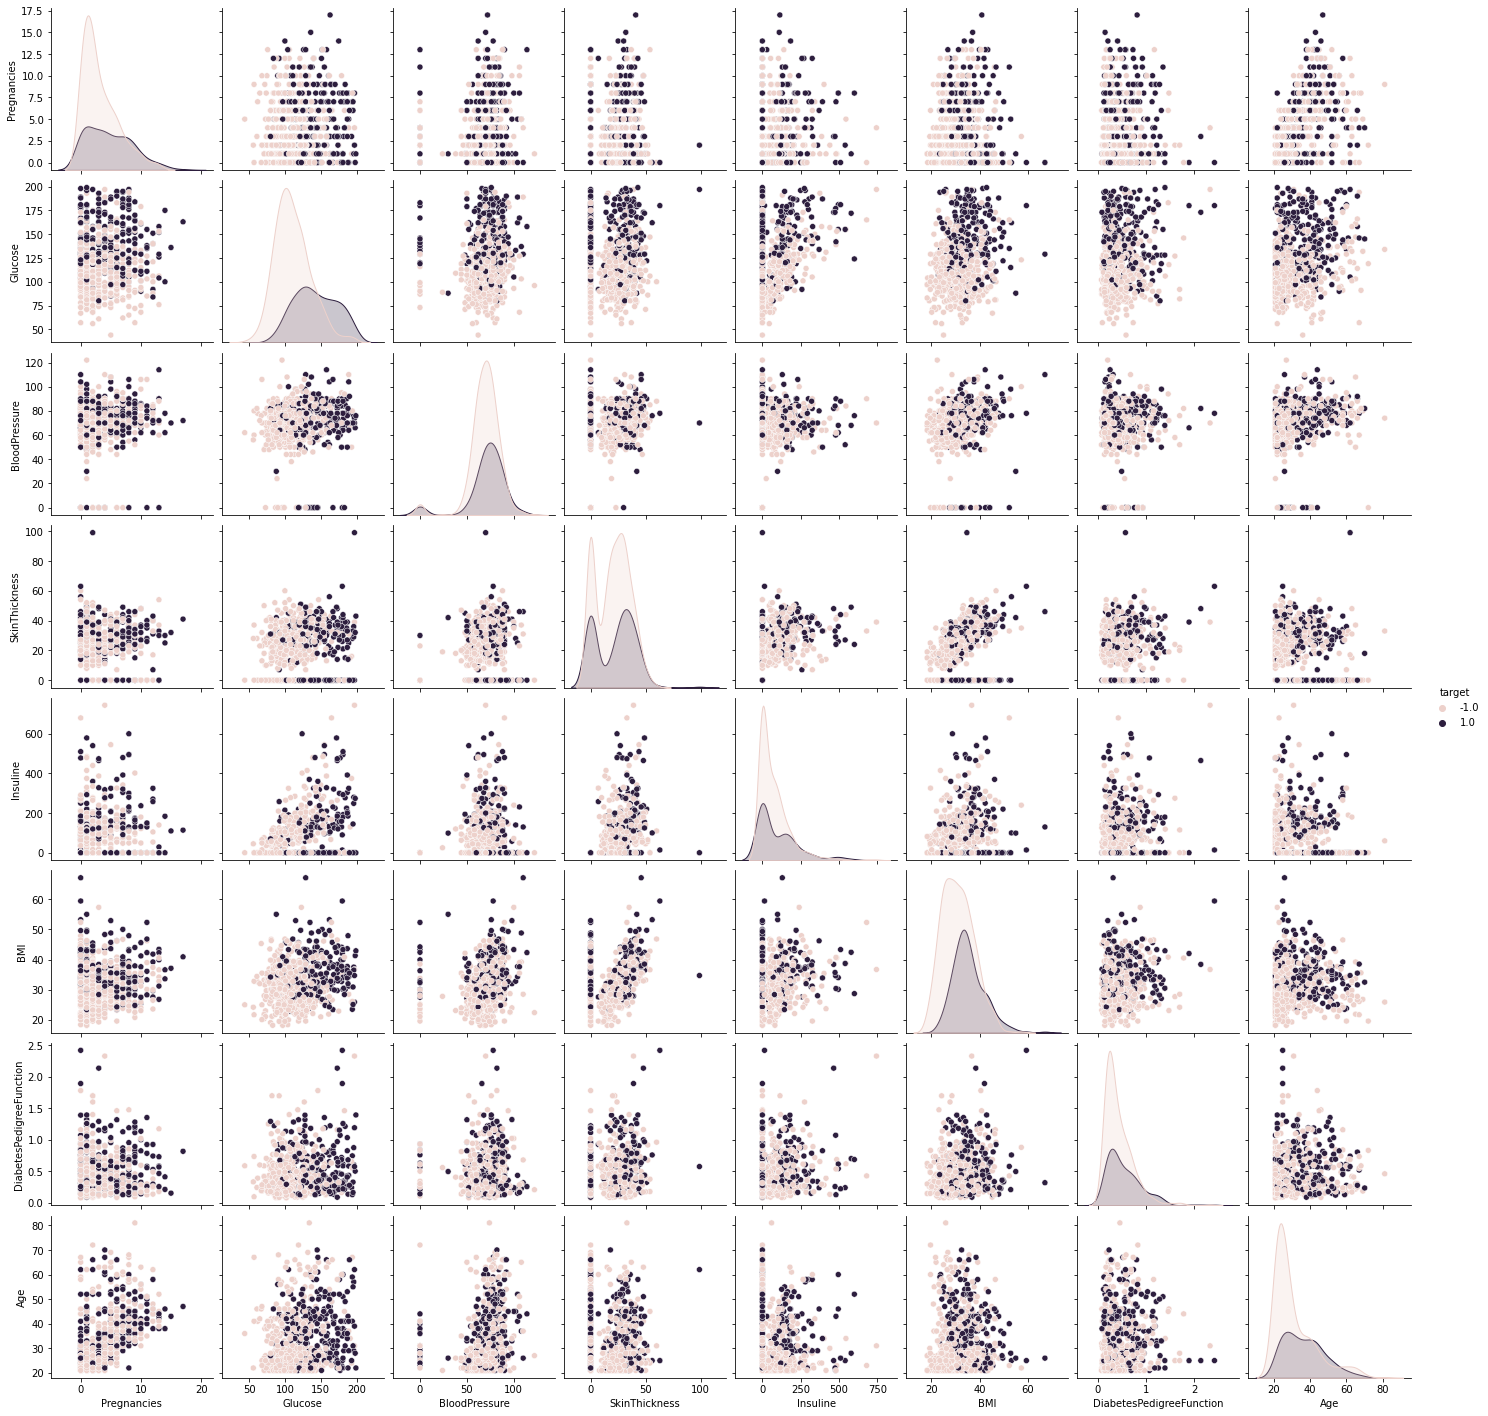

In [10]:
# The plot to find a linear relations, and separate the data (diabbetics and non diabetic)
sns.pairplot(data,hue = 'target')
plt.show()

From the plot, we can see that the age, the BMI, the glucose are the variable that makes more sens to distinguish between the diabetics and non diabetics. We can observe that it is easier to separate between the diabetics and non diabetics based on these variabes than the others.

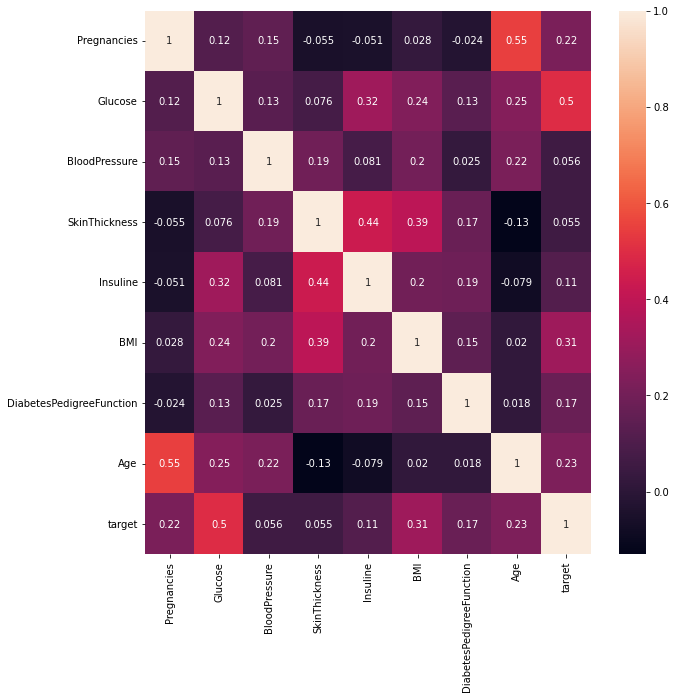

In [11]:
# The corr matrix between the features 
corrMatrix = data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

As we saw in the previous plots, we can see that, respectively,Glucose, BMI and Age are the variables that seems to have a strong (linear) relationship with the target variable. From a medical point of view, Th glucose is to first thing to do to know if you are a diabetic or not, thus it should be the strongest variable to determine if a person is diabetic or not. Also, BMI and the age are an important factors of diabetes.As a conclusion, what we got from all the plots and statistics, are coherent with our perspective.  

In [12]:
# Split the data into train and test datasets
X = pd.DataFrame(x1,columns = ('Pregnancies','Glucose','BloodPressure','SkinThickness',
                                  'Insuline','BMI','DiabetesPedigreeFunction','Age'))
x_train = X[300:]
y_train = y1[300:]
x_test = X[:300]
y_test = y1[:300]

From the table above, the features don't have all the same variances. To work with non standarized data it would cause a problem, because the features are not from the same scale, so the model will give more weigth to the features with high values, thus, the model is not performing good and we lose interpretability of the results. 

In [13]:
# Let's standardize the data 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### 2.2 Bayesian decision and linear classification 

In [14]:
# fit the LinearDiscriminantAnalysis() model on the training dataset
LDA = LinearDiscriminantAnalysis().fit(x_train,y_train)
# Accuracy on the training dataset
accuracy_train_LDA = accuracy_score(y_train,LDA.predict(x_train))
print("the accuarcy of LDA model on the training dataset is :{:.2%}".format(accuracy_train_LDA))

the accuarcy of LDA model on the training dataset is :79.95%


In [15]:
# Accuracy on the test dataset
y_pred = LDA.predict(x_test)
accuracy_LDA = accuracy_score(y_test,y_pred)
print("the accuarcy of LDA model on the test dataset is : {:.2%}".format(accuracy_LDA))

the accuarcy of LDA model on the test dataset is : 75.67%


In [16]:
# AUC on the test dataset

proba_pred = LDA.predict_proba(x_test)
auc_LDA = roc_auc_score(y_test, proba_pred[:, 1])
print("AUC for the test dataset is : {:.2%}".format(auc_LDA))

AUC for the test dataset is : 81.00%


The model gives a good accuracy and a good AUC, which means that the model could distinguish between the diabetic and non diabetic persons. 

In [17]:
# GridsearchCV on the shrinkage paramater 
LDA = LinearDiscriminantAnalysis()
param_grid={'shrinkage':['auto']+[i*0.01 for i in range(100)], 'solver' : ('lsqr', 'eigen')}
cv = GridSearchCV(LDA ,param_grid)
cv.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=None,
             param_grid={'shrinkage': ['auto', 0.0, 0.01, 0.02, 0.03, 0.04,
                                       0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11,
                                       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18,
                                       0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25,
                                       0.26, 0.27, 0.28, ...],
                         'solver': ('lsqr', 'eigen')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [18]:
# Best estimator and best params of the best model 
LDA_opt = cv.best_estimator_
param_opt = cv.best_params_
y_pred = LDA_opt.predict(x_test)
accuracy_LDA_grid = accuracy_score(y_test,y_pred)
proba_pred = LDA_opt.predict_proba(x_test)
auc_LDA_grid = roc_auc_score(y_test, proba_pred[:, 1])
print("Best parameters of the model :", param_opt)
print("the accuarcy of GridsearchCV LDA model on the test dataset is : {:.2%}".format(accuracy_LDA_grid))
print("the AUC of GridsearchCV LDA model on the test dataset is : {:.2%}".format(auc_LDA_grid))

Best parameters of the model : {'shrinkage': 0.16, 'solver': 'lsqr'}
the accuarcy of GridsearchCV LDA model on the test dataset is : 75.67%
the AUC of GridsearchCV LDA model on the test dataset is : 81.08%


The gridsearch on the parameters given doen't enhance the performance of the model. Thus, we can keep working with LDA model preiously created. 

In [19]:
# fit the QDA model on the training dataset
QDA = QuadraticDiscriminantAnalysis().fit(x_train,y_train)
# Accuracy on the training dataset
accuracy_train_QDA = accuracy_score(y_train,QDA.predict(x_train))
print("the accuarcy of QDA model on the training dataset is : {:.2%}".format(accuracy_train_QDA))

the accuarcy of QDA model on the training dataset is : 79.71%


In [20]:
# Accuracy on the test dataset for QDA model
y_pred = QDA.predict(x_test)
accuracy_QDA = accuracy_score(y_test,y_pred)
print("the accuarcy of QDA model on the test dataset is : {:.2%}".format(accuracy_QDA))

the accuarcy of QDA model on the test dataset is : 74.00%


In [21]:
# AUC on the test dataset
proba_pred = QDA.predict_proba(x_test)
auc_QDA = roc_auc_score(y_test, proba_pred[:, 1])
print("AUC for the test dataset is for the QDA model : {:.2%}".format(auc_QDA))

AUC for the test dataset is for the QDA model : 80.30%


The LDA model with default parameters gives a bit better results on the test dataset, based on, both, the accuracy and AUC metrics.

In [22]:
# GridsearchCV on the shrinkage paramater 
QDA = QuadraticDiscriminantAnalysis()
param_grid={'reg_param': np.logspace(-2,0,100)}
cv = GridSearchCV(QDA ,param_grid)
cv.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                                                     store_covariance=False,
                                                     tol=0.0001),
             iid='deprecated', n_jobs=None,
             param_grid={'reg_param': array([0.01      , 0.01047616, 0.01097499, 0.01149757, 0.01204504,
       0.01261857, 0.01321941, 0.01384886, 0.01450829, 0.01519911,
       0.01592283, 0.01668101, 0.01747528, 0.01830738, 0.01...
       0.25950242, 0.27185882, 0.28480359, 0.29836472, 0.31257158,
       0.32745492, 0.34304693, 0.35938137, 0.37649358, 0.39442061,
       0.41320124, 0.43287613, 0.45348785, 0.47508102, 0.49770236,
       0.52140083, 0.54622772, 0.57223677, 0.59948425, 0.62802914,
       0.65793322, 0.68926121, 0.7220809 , 0.75646333, 0.7924829 ,
       0.83021757, 0.869749  , 0.91116276, 0.95454846, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, ret

In [23]:
# Best estimator and best params of the best model 
QDA_opt = cv.best_estimator_
param_opt = cv.best_params_
y_pred = QDA_opt.predict(x_test)
accuracy_QDA_grid = accuracy_score(y_test,y_pred)
proba_pred = QDA_opt.predict_proba(x_test)
auc_QDA_grid = roc_auc_score(y_test, proba_pred[:, 1])
print("Best parameters of the model :", param_opt)
print("the accuarcy of GridsearchCV QDA model on the test dataset is : {:.2%}".format(accuracy_QDA_grid))
print("the AUC of GridsearchCV QDA model on the test dataset is : {:.2%}".format(auc_QDA_grid))

Best parameters of the model : {'reg_param': 0.8697490026177834}
the accuarcy of GridsearchCV QDA model on the test dataset is : 73.33%
the AUC of GridsearchCV QDA model on the test dataset is : 80.53%


The GridsearchCV on reg_param for QDA model doesn't enhance the performance of the QDA model. In breif, till now LDA model with default parameters still the best estimator.

In [24]:
# GaussianNB model 
GNB = GaussianNB().fit(x_train,y_train)
# Accuracy on the training dataset
accuracy_train_GNB = accuracy_score(y_train,GNB.predict(x_train))
print("the accuarcy of GNB model on the training dataset is :{:.2%}".format(accuracy_train_GNB))

the accuarcy of GNB model on the training dataset is :80.20%


In [25]:
# Accuracy on the test dataset
y_pred = GNB.predict(x_test)
accuracy_GNB = accuracy_score(y_test,y_pred)
print("the accuarcy of GNB model on the test dataset is : {:.2%}".format(accuracy_GNB))

the accuarcy of GNB model on the test dataset is : 74.33%


In [26]:
# AUC on the test dataset
proba_pred = GNB.predict_proba(x_test)
auc_GNB = roc_auc_score(y_test, proba_pred[:, 1])
print("AUC for the test dataset is : {:.2%}".format(auc_GNB))

AUC for the test dataset is : 80.27%


The LDA model still perfomes better than the gaussian naive bayes and QDA models, but gaussian NB is better in performance than QDA model. 

In [27]:
# Perfom a logistic regression on the data 
LR = LogisticRegression().fit(x_train,y_train)
# Accuracy on the training dataset
accuracy_train_LR = accuracy_score(y_train,LR.predict(x_train))
print("the accuarcy of logistic regression model on the training dataset is :{:.2%}".format(accuracy_train_LR))

the accuarcy of logistic regression model on the training dataset is :80.20%


In [28]:
# Accuracy on the test dataset
y_pred = LR.predict(x_test)
accuracy_LR = accuracy_score(y_test,y_pred)
print("the accuarcy of logistic regression model on the test dataset is : {:.2%}".format(accuracy_LR))

the accuarcy of logistic regression model on the test dataset is : 76.00%


In [29]:
# AUC on the test dataset
proba_pred = LR.predict_proba(x_test)
auc_LR = roc_auc_score(y_test, proba_pred[:, 1])
print("AUC for logistic regression model on the test dataset is : {:.2%}".format(auc_LR))

AUC for logistic regression model on the test dataset is : 81.33%


From all the models performed previousely, the logistic regression gives the best results, then LDA, then Gaussian NB and QDA model. This comparison is based on the accuracy and AUC metrics. we can see other metrics, but the logistic regression will be the best model to take from all the previous models

In [30]:
# GridsearchCV on the shrinkage paramater 
LR = LogisticRegression(penalty = 'l1')
param_grid={'C': np.logspace(-2,2,100),'solver' : ('liblinear','saga')}
cv = GridSearchCV(LR ,param_grid)
cv.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-02,...
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02]),
       

In [31]:
# Best estimator and best params of the best model 
LR_opt = cv.best_estimator_
param_opt = cv.best_params_
y_pred = LR_opt.predict(x_test)
accuracy_LR_grid = accuracy_score(y_test,y_pred)
proba_pred = LR_opt.predict_proba(x_test)
auc_LR_grid = roc_auc_score(y_test, proba_pred[:, 1])
print("Best parameters of the model :", param_opt)
print("the accuarcy of GridsearchCV LR model on the test dataset is : {:.2%}".format(accuracy_LR_grid))
print("the AUC of GridsearchCV LR model on the test dataset is : {:.2%}".format(auc_LR_grid))

Best parameters of the model : {'C': 0.05857020818056667, 'solver': 'saga'}
the accuarcy of GridsearchCV LR model on the test dataset is : 73.00%
the AUC of GridsearchCV LR model on the test dataset is : 79.66%


In [32]:
LR = LogisticRegression().fit(x_train,y_train)
print("the coefficients of the l1 regularized model : ",LR_opt.coef_)
print("\n The coefficients of the defaults model : " ,LR.coef_)

the coefficients of the l1 regularized model :  [[0.21539629 1.02910881 0.         0.         0.         0.29505084
  0.         0.02363248]]

 The coefficients of the defaults model :  [[ 0.45791011  1.36575598 -0.30218059 -0.02903272 -0.05462783  0.65745283
   0.19159292  0.19902591]]


The logistic regression model with default parameters perform well than regularized one. So, till now the logistic regression with default paramters is the best classifier.  The coefficients of 4 variables ('BloodPressure','SkinThickness',
'Insuline','DiabetesPedigreeFunction') are nulle in the penalized model, model is sparse which was expected by using the l1 penalty.

Till now the Logistic regression is the best predictor, then LDA. So the linear models are best till now. We can say that the data is linearly separable in some sens, so the quadratic estimations would just make it worst.

Till now, the logistics regression is the best model, but we can use also the penalized model to make the interpretability of the results more clear. The most relevant variables have non zeros coefficients and the others have a zero coefficients, and the most relevant variables have the important coefficients. So, the Glucose variable, as expected has the bigger coefficient, then BMI variables and so on, as we have seen in the correlation matrix. As conclusion, the linear model gives best scores, and the results given are coherent with the medical perspectives.

### 2.3 Nonlinear methods

In [33]:
# Let's fit all the model on the training dataset we have 

RF = RandomForestClassifier().fit(x_train,y_train)
SV = SVC(probability=True).fit(x_train,y_train)
MLP = MLPClassifier(max_iter=2000).fit(x_train,y_train)
GB = GradientBoostingClassifier().fit(x_train,y_train)

In [34]:
# The performance of each of the nonlinear models 

# Accuracy 
accuracy_RF = accuracy_score(y_test,RF.predict(x_test))
accuracy_SV = accuracy_score(y_test,SV.predict(x_test))
accuracy_MLP = accuracy_score(y_test,MLP.predict(x_test))
accuracy_GB = accuracy_score(y_test,GB.predict(x_test))

# AUC on the test dataset
proba_pred = RF.predict_proba(x_test)
auc_RF = roc_auc_score(y_test, proba_pred[:, 1])
proba_pred = SV.predict_proba(x_test)
auc_SV = roc_auc_score(y_test, proba_pred[:, 1])
proba_pred = MLP.predict_proba(x_test)
auc_MLP = roc_auc_score(y_test, proba_pred[:, 1])
proba_pred = GB.predict_proba(x_test)
auc_GB = roc_auc_score(y_test, proba_pred[:, 1])

print("the accuarcy of RandomForest model on the test dataset is :{:.2%}".format(accuracy_RF))
print("the accuarcy of SVC model on the test dataset is :{:.2%}".format(accuracy_SV))
print("the accuarcy of MLP model on the test dataset is :{:.2%}".format(accuracy_MLP))
print("the accuarcy of GradientBoosting model on the test dataset is :{:.2%}".format(accuracy_GB))
print("AUC of RandomForest model for the test dataset is : {:.2%}".format(auc_RF))
print("AUC of SVC model for the test dataset is : {:.2%}".format(auc_SV))
print("AUC of MLP model for the test dataset is : {:.2%}".format(auc_MLP))
print("AUC of GradientBoosting model for the test dataset is : {:.2%}".format(auc_GB))

the accuarcy of RandomForest model on the test dataset is :74.00%
the accuarcy of SVC model on the test dataset is :74.00%
the accuarcy of MLP model on the test dataset is :73.33%
the accuarcy of GradientBoosting model on the test dataset is :70.33%
AUC of RandomForest model for the test dataset is : 79.53%
AUC of SVC model for the test dataset is : 81.08%
AUC of MLP model for the test dataset is : 82.04%
AUC of GradientBoosting model for the test dataset is : 78.98%


With these results, the logistic prove that it is a good estimator till now, even against the random forest, SVC and MLP models.

In [35]:
# Let's perform an gridsearchcv to try to enhance the performance of the nonlinear classifiers

RF = RandomForestClassifier()
SV = SVC(probability=True)

param_RF = {'n_estimators': [200, 500],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,5,6,7,8],
            'criterion' :['gini', 'entropy']}
param_SV = {'kernel':('linear', 'rbf','poly'), 'C':np.arange(0.1,10,0.1)}

cv_rf = GridSearchCV(RF ,param_RF)
cv_svc = GridSearchCV(SV ,param_SV)

cv_rf.fit(x_train,y_train)
cv_svc.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,...
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                         'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=Tr

In [36]:
# Best estimator and best params of the best model 
RF_opt = cv_rf.best_estimator_
SVC_opt = cv_svc.best_estimator_
# Accuracy of each of the models

accuracy_RF_grid = accuracy_score(y_test,RF_opt.predict(x_test))
accuracy_SV_grid = accuracy_score(y_test,SVC_opt.predict(x_test))

# AUC on the test dataset
proba_pred = RF_opt.predict_proba(x_test)
auc_RF_grid = roc_auc_score(y_test, proba_pred[:, 1])
proba_pred = SVC_opt.predict_proba(x_test)
auc_SV_grid = roc_auc_score(y_test, proba_pred[:, 1])

print("the accuarcy of Gridsearch RandomForest model on the test dataset is :{:.2%}".format(accuracy_RF_grid))
print("the accuarcy of Gridsearch SVC model on the test dataset is :{:.2%}".format(accuracy_SV_grid))
print("AUC of Gridsearch RandomForest model for the test dataset is : {:.2%}".format(auc_RF_grid))
print("AUC of Gridsearch SVC model for the test dataset is : {:.2%}".format(auc_SV_grid))

the accuarcy of Gridsearch RandomForest model on the test dataset is :74.00%
the accuarcy of Gridsearch SVC model on the test dataset is :72.33%
AUC of Gridsearch RandomForest model for the test dataset is : 80.38%
AUC of Gridsearch SVC model for the test dataset is : 81.00%


With the following parameters for gridsearch, we didn't get a better perfomance for these models, despite the bit enhancement for the random forest model, it still not valuable.

### 2.4 Comparison and interpretation

In [37]:
# Collect of the test performances for all methods investigated, in a dataframe
performance = pd.DataFrame({'LDA':[accuracy_LDA,auc_LDA],'LDA_grid':[accuracy_LDA_grid,auc_LDA_grid],
                'QDA':[accuracy_LDA,auc_LDA],'QDA_grid':[accuracy_LDA_grid,auc_LDA_grid],
                'Logistics_regression':[accuracy_LR,auc_LR],'Logistics_regression_grid':[accuracy_LR_grid,auc_LR_grid],
                'random_forest':[accuracy_RF,auc_RF], 'random_forest_grid':[accuracy_RF_grid,auc_RF_grid],
                'svc':[accuracy_SV,auc_SV], 'svc_grid':[accuracy_SV_grid,auc_SV_grid],'MLP':[accuracy_MLP,auc_MLP],
                'GradientBoosting':[accuracy_GB,auc_GB]
                          }, index = ['accuracy','auc'])
performance

,LDA,LDA_grid,QDA,QDA_grid,Logistics_regression,Logistics_regression_grid,random_forest,random_forest_grid,svc,svc_grid,MLP,GradientBoosting
accuracy,0.756667,0.756667,0.756667,0.756667,0.760000,0.730000,0.740000,0.74000,0.740000,0.723333,0.733333,0.703333
auc,0.810000,0.810766,0.810000,0.810766,0.813301,0.796555,0.795335,0.80378,0.810789,0.810048,0.820431,0.789809


In our case, the logistic regression was the winner, but not far from the other models. In practice, the random forest is good classifier, and work very well in a lot of cases where the relation is difficult to model. Also, the MLP and Gradient boosting work very well too. But, in this case, the data was linearly separable, that's why a linear mmodel worked very well.

In this case the logistic regression is the best classifier. Despite, the MLP has bigger auc which should taken in consideration because the data is imbalanced and we talk about a medical diagnostic, the values of the AUC are not too far (around 0.3%) but the accuracy is better for the logistic regression. So From a medicale percpective we can take MLP models.
In this case, and to win interpretability of the results, and because the auc of the logistic regression and MLP model are a bit different, we can work with logistic regression, so we don't need non-linearity in this kind of applications.

In [38]:
# Confusion matrix of the logistic regression
LR = LogisticRegression().fit(x_train,y_train)
pred_y = LR.predict(x_test)
conf_matrix = confusion_matrix(y_test, pred_y)
print("Confusion matrix of the logistic regression is :", conf_matrix)
print("\n False negative rate for this classifier is :",(conf_matrix[1][0]/(conf_matrix[1][0] + conf_matrix[0][0])))

Confusion matrix of the logistic regression is : [[166  24]
 [ 48  62]]

 False negative rate for this classifier is : 0.22429906542056074


In medicine, we know that we can't have an accurate tests, but the FNR says that more than 20% of diabetic persons will tell that they are not, which is dangerous for them. For this kind of tests we should have a FNR around 5%.

In [39]:
# Let's change the intercept of trained model to have a less FNR
# We add an constant value to the intercept to predict a diabetic after smaller threshold (because the 
#logit function is monotonically increasing)
LR.intercept_ = 1 # we can modify this value untill we get the required FNR
pred_y = LR.predict(x_test)
conf_matrix = confusion_matrix(y_test, pred_y)
accuracy_LR_modified = accuracy_score(y_test,LR.predict(x_test))

print("Confusion matrix of the logistic regression is :", conf_matrix)
print("\n False negative rate for this classifier is :",(conf_matrix[1][0]/(conf_matrix[1][0] + conf_matrix[0][0])))
print("the accuarcy of modified LR model on the test dataset is : {:.2%}".format(accuracy_LR_modified))

Confusion matrix of the logistic regression is : [[ 82 108]
 [  6 104]]

 False negative rate for this classifier is : 0.06818181818181818
the accuarcy of modified LR model on the test dataset is : 62.00%


We can change the thresold or we change the output of the models. Changing the threshold means make a translation of the output, but what we have done is changing all the model. As we can see, by changing the intercept, we lost a lot from the accuracy and so all the other metrics.

## 3 Predicting Classes on the Digits dataset

In [40]:
# Let's reshape the data to (n_samples,)
y2 = y2.reshape((3000,))
yt2 = yt2.reshape((1500,))

# Let's fit all the model on the training dataset we have 
RF = RandomForestClassifier().fit(x2,y2)
SV = SVC(probability=True).fit(x2,y2)
MLP = MLPClassifier(max_iter=2000).fit(x2,y2)
GB = GradientBoostingClassifier().fit(x2,y2)
# Accuracy 
accuracy_RF = accuracy_score(y2,RF.predict(x2))
accuracy_SV = accuracy_score(y2,SV.predict(x2))
accuracy_MLP = accuracy_score(y2,MLP.predict(x2))
accuracy_GB = accuracy_score(y2,GB.predict(x2))

print("the accuarcy of RandomForest model on the training dataset is :{:.2%}".format(accuracy_RF))
print("the accuarcy of SVC model on the training dataset is :{:.2%}".format(accuracy_SV))
print("the accuarcy of MLP model on the training dataset is :{:.2%}".format(accuracy_MLP))
print("the accuarcy of GradientBoosting model on the training dataset is :{:.2%}".format(accuracy_GB))

the accuarcy of RandomForest model on the training dataset is :100.00%
the accuarcy of SVC model on the training dataset is :99.63%
the accuarcy of MLP model on the training dataset is :100.00%
the accuarcy of GradientBoosting model on the training dataset is :100.00%


In [41]:
# The performance of each of the models on the test dataset 

# Accuracy 
accuracy_RF = accuracy_score(yt2,RF.predict(xt2))
accuracy_SV = accuracy_score(yt2,SV.predict(xt2))
accuracy_MLP = accuracy_score(yt2,MLP.predict(xt2))
accuracy_GB = accuracy_score(yt2,GB.predict(xt2))

print("the accuarcy of RandomForest model on the test dataset is :{:.2%}".format(accuracy_RF))
print("the accuarcy of SVC model on the test dataset is :{:.2%}".format(accuracy_SV))
print("the accuarcy of MLP model on the test dataset is :{:.2%}".format(accuracy_MLP))
print("the accuarcy of GradientBoosting model on the test dataset is :{:.2%}".format(accuracy_GB))

the accuarcy of RandomForest model on the test dataset is :97.27%
the accuarcy of SVC model on the test dataset is :98.33%
the accuarcy of MLP model on the test dataset is :98.13%
the accuarcy of GradientBoosting model on the test dataset is :97.00%


In [42]:
# GridsearchCV for SVC 
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
cv_svc = GridSearchCV(SVC(),param_grid)
cv_svc.fit(x2,y2)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
# GridsearchCv for randomforest
param_grid = { 'n_estimators': [200,500],'max_features': ['sqrt', 'log2'],'max_depth' : [4,5,6]}
cv_rf = GridSearchCV(RandomForestClassifier(),param_grid)
cv_rf.fit(x2,y2)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [44]:
# GridsearchCv for MLPclassifier
parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400], 
              'alpha': 10.0 ** -np.arange(1, 4), 'hidden_layer_sizes':np.arange(10, 15,2)}
cv_mlp = GridSearchCV(MLPClassifier(),parameters)
cv_mlp.fit(x2,y2)

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...ne, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [45]:
# GridsearchCv for GradientBoostingClassifier
parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "n_estimators":[10,50,10]
    }
cv_gb = GridSearchCV(GradientBoostingClassifier(),parameters)
cv_gb.fit(x2,y2)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...
                 

In [46]:
# The scores of the gridsearchCV model, for random forest and svc models 

# Best estimator and best params of the best model 
RF_opt = cv_rf.best_estimator_
SVC_opt = cv_svc.best_estimator_
MLP_opt = cv_mlp.best_estimator_
GB_opt = cv_gb.best_estimator_

# Accuracy of each of the models
accuracy_RF_grid = accuracy_score(yt2,RF_opt.predict(xt2))
accuracy_SV_grid = accuracy_score(yt2,SVC_opt.predict(xt2))
accuracy_SV_grid = accuracy_score(yt2,SVC_opt.predict(xt2))
accuracy_SV_grid = accuracy_score(yt2,SVC_opt.predict(xt2))

print("the accuarcy of Gridsearch RandomForest model on the test dataset is :{:.2%}".format(accuracy_RF_grid))
print("the accuarcy of Gridsearch SVC model on the test dataset is :{:.2%}".format(accuracy_SV_grid))
print("AUC of Gridsearch RandomForest model for the test dataset is : {:.2%}".format(auc_RF_grid))
print("AUC of Gridsearch SVC model for the test dataset is : {:.2%}".format(auc_SV_grid))

the accuarcy of Gridsearch RandomForest model on the test dataset is :96.80%
the accuarcy of Gridsearch SVC model on the test dataset is :97.67%
AUC of Gridsearch RandomForest model for the test dataset is : 80.38%
AUC of Gridsearch SVC model for the test dataset is : 81.00%


The GridsearchCV didn't give any enhancement to the models, thus we keep working with the models with the defaults parameters.

### 3.2 Interpreting the classifier

####  The performance of the different models

In [47]:
# Accuracy 
accuracy_RF = accuracy_score(yt2,RF.predict(xt2))
accuracy_SV = accuracy_score(yt2,SV.predict(xt2))
accuracy_MLP = accuracy_score(yt2,MLP.predict(xt2))
accuracy_GB = accuracy_score(yt2,GB.predict(xt2))

print("the accuarcy of RandomForest model on the test dataset is :{:.2%}".format(accuracy_RF))
print("the accuarcy of SVC model on the test dataset is :{:.2%}".format(accuracy_SV))
print("the accuarcy of MLP model on the test dataset is :{:.2%}".format(accuracy_MLP))
print("the accuarcy of GradientBoosting model on the test dataset is :{:.2%}".format(accuracy_GB))

the accuarcy of RandomForest model on the test dataset is :97.27%
the accuarcy of SVC model on the test dataset is :98.33%
the accuarcy of MLP model on the test dataset is :98.13%
the accuarcy of GradientBoosting model on the test dataset is :97.00%


In [48]:
# F1-score
f1_RF = f1_score(yt2,RF.predict(xt2),average='weighted')
f1_SV = f1_score(yt2,SV.predict(xt2),average='weighted')
f1_MLP = f1_score(yt2,MLP.predict(xt2),average='weighted')
f1_GB = f1_score(yt2,GB.predict(xt2),average='weighted')

print("the f1 of RandomForest model on the test dataset is :{:.2%}".format(f1_RF))
print("the f1 of SVC model on the test dataset is :{:.2%}".format(f1_SV))
print("the f1 of MLP model on the test dataset is :{:.2%}".format(f1_MLP))
print("the f1 of GradientBoosting model on the test dataset is :{:.2%}".format(f1_GB))

the accuarcy of RandomForest model on the test dataset is :97.27%
the accuarcy of SVC model on the test dataset is :98.33%
the accuarcy of MLP model on the test dataset is :98.13%
the accuarcy of GradientBoosting model on the test dataset is :97.00%


In [49]:
#Roc-auc
roc_auc_score_RF = roc_auc_score(yt2,RF.predict_proba(xt2), multi_class='ovr')
roc_auc_score_SV = roc_auc_score(yt2,SV.predict_proba(xt2), multi_class='ovr')
roc_auc_score_MLP = roc_auc_score(yt2,MLP.predict_proba(xt2), multi_class='ovr')
roc_auc_score_GB = roc_auc_score(yt2,GB.predict_proba(xt2), multi_class='ovr')

print("the roc_auc_score of RandomForest model on the test dataset is :{:.2%}".format(roc_auc_score_RF))
print("the roc_auc_score of SVC model on the test dataset is :{:.2%}".format(roc_auc_score_SV))
print("the roc_auc_score of MLP model on the test dataset is :{:.2%}".format(roc_auc_score_MLP))
print("the roc_auc_score of GradientBoosting model on the test dataset is :{:.2%}".format(roc_auc_score_GB))

the accuarcy of RandomForest model on the test dataset is :99.87%
the accuarcy of SVC model on the test dataset is :99.94%
the accuarcy of MLP model on the test dataset is :99.85%
the accuarcy of GradientBoosting model on the test dataset is :99.83%


Based on all the metrics and all the methods used, the SVC model gives the best scores for all the metrics used. 

In [50]:
# Let's predict labels using the SVC model above 
predicted = SV.predict(xt2)

In [51]:
# The confusion matrix for this model
conf_matrix = confusion_matrix(yt2,predicted)
print("The confusion matrix for the best model is :", conf_matrix)

The confusion matrix for the best model is : [[495   2   3]
 [ 12 484   4]
 [  0   4 496]]


From the confusion matrix, we see that the class'1' is never recognized as class '8', which is true, because there is no similarities between 1 and 7. But, in the other hand, the class '1' is the most difficult to recognize because of the similarities between the class '1' and the class '7'. So the classes '1' and '7' are harder to discriminate. 

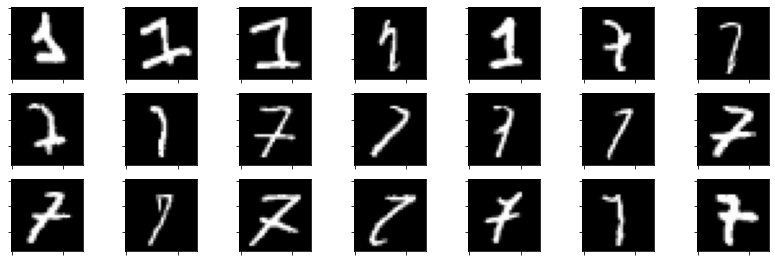

In [52]:
# Let's plot the sample that are miss-classified.
num_row = 3 # number of rows used to plot the images 
num_col = 7 # plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,1.5*num_row))
k = 0
for i in range(yt2.shape[0]):
    if yt2[i] != predicted[i] and k < 21: 
        ax = axes[k//num_col, k%num_col]
        ax.imshow(xt2[i].reshape((28,28)), cmap='gray')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.grid(False)
        k+=1
plt.show() 

Some of the images are difficult to recognize, but the majority are recognizable. The problem here is that a small changes in the input values could change the output, because of the dimensionality of the space and the range of input that can be given as input. The adversarial examples are very know in the computer vision and still a field of research. So if we change the values of all the pixels without changing output image, the model will give an other output, in this cases the model may not recognize the shape.

In [53]:
# Let's create 1000 samples for the well classified 
epsilon = 0.02
for i in tqdm(range(1500)):
    if yt2[i] == predicted[i]:
        sample = xt2[i]
        adversarial_examples = sample + (np.random.randn(1000,784)*epsilon)
        pred = SV.predict(adversarial_examples)
        accuracy_adversarial = accuracy_score(np.ones((1000))*yt2[i],pred)
        if accuracy_adversarial != 1 :
            break

 40%|████      | 602/1500 [06:29<09:41,  1.54it/s]


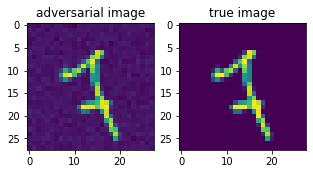

In [54]:
# Let's plot the true and the noised images
fig, axes = plt.subplots(1, 2, figsize=(5,5))
axes[0].imshow(adversarial_examples[100].reshape((28,28)))
axes[0].set_title("adversarial image")
axes[1].imshow(xt2[i].reshape((28,28)))
axes[1].set_title("true image")
plt.show()

In [55]:
# Let's see the accuracy of the noised samples 
pred = SV.predict(adversarial_examples)
accuracy_adversarial = accuracy_score(np.ones((1000))*yt2[i],pred)
print("the accuarcy of SVC model on adversarial examples is :{:.2%}".format(accuracy_adversarial))

the accuarcy of SVC model on adversarial examples is :92.40%


For the very noised images, the model couldn't recognize the classes. But, in the most cases the model still recognize the whole noised dataset, even for a big 'epsilon'. In brief, the model is not totally robust against adversarial examples, but it still could be used in a special cases.

## CNN model :

In [7]:
# Let's reshape all the images, to be (28,28,1) shape, and transform the labels to categorical one-hot, having 1 in the index of the label
x2 = x2.reshape((x2.shape[0],28,28,1))
xt2 = xt2.reshape((xt2.shape[0],28,28,1))
# to categorical
y2 = to_categorical(y2)
yt2 = to_categorical(yt2)

In [8]:
# Let's create a cnn model using keras (nn.Sequential())
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=(28,28,1), name='Conv1'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',name='Conv2'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu',name='Conv3'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))

# The summary of the model(its architecture)
print("Model : ",model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [9]:
# compile, train and evaluate model
model.compile(loss = 'categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])
model.fit(x2,y2,validation_data = (xt2,yt2),epochs = 15,batch_size=128)
# Evalution of the model
score = model.evaluate(xt2,yt2, verbose=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/15
24/24 [==============================] - 4s 131ms/step - loss: 0.5699 - accuracy: 0.7777 - val_loss: 0.1478 - val_accuracy: 0.9487
Epoch 2/15
24/24 [==============================] - 3s 121ms/step - loss: 0.1114 - accuracy: 0.9643 - val_loss: 0.0857 - val_accuracy: 0.9667
Epoch 3/15
24/24 [==============================] - 3s 121ms/step - loss: 0.0541 - accuracy: 0.9833 - val_loss: 0.0564 - val_accuracy: 0.9773
Epoch 4/15
24/24 [==============================] - 3s 121ms/step - loss: 0.0470 - accuracy: 0.9853 - val_loss: 0.0493 - val_accuracy: 0.9807
Epoch 5/15
24/24 [==============================] - 3s 121ms/step - loss: 0.0397 - accuracy: 0.9887 - val_loss: 0.0722 - val_accuracy: 0.9767
Epoch 6/15
24/24 [==============================] - 3s 122ms/step - loss: 0.0293 - accuracy: 0.9917 - val_loss: 0.0539 - val_accuracy: 0.9833
Epoch 7/15
24/24 [==============================] - 3s 123ms/step - loss: 0.0212 - accuracy: 0.9930 - val_loss: 0.0324 - val_accuracy: 0.9907
Epoch 

The CNN model perform very well than the other models, on both the training and the test datasets.

In [21]:
# Let see if the model is robust to adversarial examples 
# Let's create 1000 samples for the well classified 
epsilon = 0.02
predicted = model.predict(xt2)
for i in tqdm(range(1500)):
    if np.argmax(yt2[i]) == np.argmax(predicted[i]):
        sample = np.expand_dims(xt2[i], axis = 0)
        adversarial_examples = sample + (np.random.randn(1000,28,28,1)*epsilon)
        score = model.evaluate(adversarial_examples,np.array([yt2[i]]*1000))
        if score[1] != 1 :
            break
print('Adversarial examples loss:', score[0])
print('Adversarial examples accuracy:', score[1])

  0%|          | 0/1500 [00:00<?, ?it/s]

32/32 [==============================] - 0s 11ms/step - loss: 6.4763e-05 - accuracy: 1.0000


  0%|          | 1/1500 [00:00<11:29,  2.17it/s]

32/32 [==============================] - 0s 10ms/step - loss: 4.2849e-05 - accuracy: 1.0000


  0%|          | 2/1500 [00:00<10:47,  2.31it/s]

32/32 [==============================] - 0s 11ms/step - loss: 5.8019e-07 - accuracy: 1.0000


  0%|          | 3/1500 [00:01<14:02,  1.78it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.4422e-06 - accuracy: 1.0000


  0%|          | 4/1500 [00:02<12:51,  1.94it/s]

32/32 [==============================] - 0s 11ms/step - loss: 9.6246e-06 - accuracy: 1.0000


  0%|          | 5/1500 [00:02<12:09,  2.05it/s]

32/32 [==============================] - 0s 11ms/step - loss: 6.5243e-07 - accuracy: 1.0000


  0%|          | 6/1500 [00:02<11:48,  2.11it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.2121e-05 - accuracy: 1.0000


  0%|          | 7/1500 [00:03<11:26,  2.18it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.7046e-06 - accuracy: 1.0000


  1%|          | 8/1500 [00:04<13:27,  1.85it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.3790e-04 - accuracy: 1.0000


  1%|          | 9/1500 [00:04<14:48,  1.68it/s]

32/32 [==============================] - 0s 10ms/step - loss: 5.0988e-05 - accuracy: 1.0000


  1%|          | 10/1500 [00:05<15:43,  1.58it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.2183e-07 - accuracy: 1.0000


  1%|          | 11/1500 [00:06<16:23,  1.51it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.4369e-04 - accuracy: 1.0000


  1%|          | 12/1500 [00:06<16:46,  1.48it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.8376e-05 - accuracy: 1.0000


  1%|          | 13/1500 [00:07<14:52,  1.67it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.4144e-04 - accuracy: 1.0000


  1%|          | 14/1500 [00:07<13:44,  1.80it/s]

32/32 [==============================] - 0s 10ms/step - loss: 0.0038 - accuracy: 1.0000


  1%|          | 15/1500 [00:08<12:42,  1.95it/s]

32/32 [==============================] - 0s 11ms/step - loss: 6.0128e-06 - accuracy: 1.0000


  1%|          | 16/1500 [00:08<12:10,  2.03it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.1915e-05 - accuracy: 1.0000


  1%|          | 17/1500 [00:09<11:46,  2.10it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.0803e-06 - accuracy: 1.0000


  1%|          | 18/1500 [00:09<11:22,  2.17it/s]

32/32 [==============================] - 0s 10ms/step - loss: 6.8096e-06 - accuracy: 1.0000


  1%|▏         | 19/1500 [00:09<11:12,  2.20it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.5256e-06 - accuracy: 1.0000


  1%|▏         | 20/1500 [00:10<13:09,  1.87it/s]

32/32 [==============================] - 0s 11ms/step - loss: 9.7370e-07 - accuracy: 1.0000


  1%|▏         | 21/1500 [00:11<12:25,  1.98it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.4497e-06 - accuracy: 1.0000


  1%|▏         | 22/1500 [00:11<11:52,  2.08it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.4617e-06 - accuracy: 1.0000


  2%|▏         | 23/1500 [00:12<13:35,  1.81it/s]

32/32 [==============================] - 0s 10ms/step - loss: 9.2328e-07 - accuracy: 1.0000


  2%|▏         | 24/1500 [00:12<12:41,  1.94it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.6378e-05 - accuracy: 1.0000


  2%|▏         | 25/1500 [00:13<14:07,  1.74it/s]

32/32 [==============================] - 0s 11ms/step - loss: 6.5024e-04 - accuracy: 1.0000


  2%|▏         | 26/1500 [00:14<15:07,  1.62it/s]

32/32 [==============================] - 0s 10ms/step - loss: 8.9567e-05 - accuracy: 1.0000


  2%|▏         | 27/1500 [00:14<13:43,  1.79it/s]

32/32 [==============================] - 0s 10ms/step - loss: 3.0661e-07 - accuracy: 1.0000


  2%|▏         | 28/1500 [00:14<12:43,  1.93it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.1339e-04 - accuracy: 1.0000


  2%|▏         | 29/1500 [00:15<14:14,  1.72it/s]

32/32 [==============================] - 0s 10ms/step - loss: 3.5019e-06 - accuracy: 1.0000


  2%|▏         | 30/1500 [00:16<15:11,  1.61it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.9062e-04 - accuracy: 1.0000


  2%|▏         | 31/1500 [00:17<15:54,  1.54it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0025 - accuracy: 1.0000


  2%|▏         | 32/1500 [00:17<14:22,  1.70it/s]

32/32 [==============================] - 0s 11ms/step - loss: 5.5744e-05 - accuracy: 1.0000


  2%|▏         | 33/1500 [00:18<15:18,  1.60it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.3077e-07 - accuracy: 1.0000


  2%|▏         | 34/1500 [00:18<13:51,  1.76it/s]

32/32 [==============================] - 0s 10ms/step - loss: 8.2678e-05 - accuracy: 1.0000


  2%|▏         | 35/1500 [00:19<12:50,  1.90it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.4353e-06 - accuracy: 1.0000


  2%|▏         | 36/1500 [00:19<14:15,  1.71it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.5966e-05 - accuracy: 1.0000


  2%|▏         | 37/1500 [00:20<13:04,  1.86it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.1694e-07 - accuracy: 1.0000


  3%|▎         | 38/1500 [00:21<14:22,  1.70it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.0563e-06 - accuracy: 1.0000


  3%|▎         | 39/1500 [00:21<13:02,  1.87it/s]

32/32 [==============================] - 0s 11ms/step - loss: 5.4359e-08 - accuracy: 1.0000


  3%|▎         | 40/1500 [00:21<12:22,  1.97it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.1607e-05 - accuracy: 1.0000


  3%|▎         | 41/1500 [00:22<11:41,  2.08it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.6512e-07 - accuracy: 1.0000


  3%|▎         | 42/1500 [00:22<11:26,  2.12it/s]

32/32 [==============================] - 0s 10ms/step - loss: 6.4802e-07 - accuracy: 1.0000


  3%|▎         | 43/1500 [00:23<11:02,  2.20it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.9174e-05 - accuracy: 1.0000


  3%|▎         | 44/1500 [00:23<10:44,  2.26it/s]

32/32 [==============================] - 0s 11ms/step - loss: 7.7510e-07 - accuracy: 1.0000


  3%|▎         | 45/1500 [00:24<10:42,  2.26it/s]

32/32 [==============================] - 0s 10ms/step - loss: 8.0995e-06 - accuracy: 1.0000


  3%|▎         | 46/1500 [00:24<10:26,  2.32it/s]

32/32 [==============================] - 0s 10ms/step - loss: 3.9041e-07 - accuracy: 1.0000


  3%|▎         | 47/1500 [00:25<12:28,  1.94it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.7162e-05 - accuracy: 1.0000


  3%|▎         | 48/1500 [00:25<11:59,  2.02it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.0401e-05 - accuracy: 1.0000


  3%|▎         | 49/1500 [00:26<13:33,  1.78it/s]

32/32 [==============================] - 0s 10ms/step - loss: 3.3656e-05 - accuracy: 1.0000


  3%|▎         | 50/1500 [00:26<12:36,  1.92it/s]

32/32 [==============================] - 0s 10ms/step - loss: 0.0043 - accuracy: 1.0000


  3%|▎         | 51/1500 [00:27<11:53,  2.03it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.2505e-05 - accuracy: 1.0000


  3%|▎         | 52/1500 [00:27<13:32,  1.78it/s]

32/32 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 1.0000


  4%|▎         | 53/1500 [00:28<12:31,  1.93it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.3949e-07 - accuracy: 1.0000


  4%|▎         | 54/1500 [00:28<11:49,  2.04it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.7740e-06 - accuracy: 1.0000


  4%|▎         | 55/1500 [00:29<11:17,  2.13it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.2482e-04 - accuracy: 1.0000


  4%|▎         | 56/1500 [00:29<10:51,  2.22it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.3842e-07 - accuracy: 1.0000


  4%|▍         | 57/1500 [00:30<12:46,  1.88it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.4165e-04 - accuracy: 1.0000


  4%|▍         | 58/1500 [00:30<11:57,  2.01it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.2024e-06 - accuracy: 1.0000


  4%|▍         | 59/1500 [00:31<11:34,  2.07it/s]

32/32 [==============================] - 0s 10ms/step - loss: 4.6873e-07 - accuracy: 1.0000


  4%|▍         | 60/1500 [00:31<13:14,  1.81it/s]

32/32 [==============================] - 0s 10ms/step - loss: 5.3525e-07 - accuracy: 1.0000


  4%|▍         | 61/1500 [00:32<12:10,  1.97it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.2974e-06 - accuracy: 1.0000


  4%|▍         | 62/1500 [00:32<11:37,  2.06it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.0214e-04 - accuracy: 1.0000


  4%|▍         | 63/1500 [00:33<13:18,  1.80it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.2189e-05 - accuracy: 1.0000


  4%|▍         | 64/1500 [00:33<12:19,  1.94it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.3389e-07 - accuracy: 1.0000


  4%|▍         | 65/1500 [00:34<11:43,  2.04it/s]

32/32 [==============================] - 0s 10ms/step - loss: 9.9726e-05 - accuracy: 1.0000


  4%|▍         | 66/1500 [00:34<11:09,  2.14it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.3277e-05 - accuracy: 1.0000


  4%|▍         | 67/1500 [00:35<10:55,  2.18it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.8527e-07 - accuracy: 1.0000


  5%|▍         | 68/1500 [00:35<10:38,  2.24it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.5652e-04 - accuracy: 1.0000


  5%|▍         | 69/1500 [00:35<10:40,  2.23it/s]

32/32 [==============================] - 0s 10ms/step - loss: 0.0339 - accuracy: 1.0000


  5%|▍         | 70/1500 [00:36<12:34,  1.89it/s]

32/32 [==============================] - 0s 10ms/step - loss: 7.7522e-07 - accuracy: 1.0000


  5%|▍         | 71/1500 [00:37<13:52,  1.72it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.0481e-06 - accuracy: 1.0000


  5%|▍         | 72/1500 [00:38<14:49,  1.61it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.8197e-05 - accuracy: 1.0000


  5%|▍         | 73/1500 [00:38<15:26,  1.54it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.8182e-04 - accuracy: 1.0000


  5%|▍         | 74/1500 [00:39<15:58,  1.49it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0037 - accuracy: 1.0000


  5%|▌         | 75/1500 [00:40<16:18,  1.46it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.3726e-05 - accuracy: 1.0000


  5%|▌         | 76/1500 [00:40<14:29,  1.64it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.3862e-06 - accuracy: 1.0000


  5%|▌         | 77/1500 [00:41<13:15,  1.79it/s]

32/32 [==============================] - 0s 10ms/step - loss: 5.0890e-07 - accuracy: 1.0000


  5%|▌         | 78/1500 [00:41<12:21,  1.92it/s]

32/32 [==============================] - 0s 10ms/step - loss: 9.0849e-07 - accuracy: 1.0000


  5%|▌         | 79/1500 [00:42<13:42,  1.73it/s]

32/32 [==============================] - 0s 10ms/step - loss: 8.3159e-06 - accuracy: 1.0000


  5%|▌         | 80/1500 [00:43<14:46,  1.60it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.0599e-06 - accuracy: 1.0000


  5%|▌         | 81/1500 [00:43<13:32,  1.75it/s]

32/32 [==============================] - 0s 10ms/step - loss: 6.3860e-07 - accuracy: 1.0000


  5%|▌         | 82/1500 [00:44<14:34,  1.62it/s]

32/32 [==============================] - 0s 11ms/step - loss: 5.4822e-05 - accuracy: 1.0000


  6%|▌         | 83/1500 [00:44<13:16,  1.78it/s]

32/32 [==============================] - 0s 10ms/step - loss: 8.3645e-05 - accuracy: 1.0000


  6%|▌         | 84/1500 [00:45<12:22,  1.91it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.6207e-05 - accuracy: 1.0000


  6%|▌         | 85/1500 [00:45<11:46,  2.00it/s]

32/32 [==============================] - 0s 10ms/step - loss: 0.0150 - accuracy: 1.0000


  6%|▌         | 86/1500 [00:46<13:19,  1.77it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.9056e-05 - accuracy: 1.0000


  6%|▌         | 87/1500 [00:46<12:23,  1.90it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.7337e-06 - accuracy: 1.0000


  6%|▌         | 88/1500 [00:47<11:38,  2.02it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.0277e-04 - accuracy: 1.0000


  6%|▌         | 89/1500 [00:47<13:12,  1.78it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.4317e-06 - accuracy: 1.0000


  6%|▌         | 90/1500 [00:48<14:16,  1.65it/s]

32/32 [==============================] - 0s 10ms/step - loss: 7.9393e-06 - accuracy: 1.0000


  6%|▌         | 91/1500 [00:48<13:00,  1.81it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.5450e-06 - accuracy: 1.0000


  6%|▌         | 92/1500 [00:49<14:08,  1.66it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.9028e-04 - accuracy: 1.0000


  6%|▌         | 93/1500 [00:50<12:53,  1.82it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.1960e-06 - accuracy: 1.0000


  6%|▋         | 94/1500 [00:50<14:06,  1.66it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.2175e-06 - accuracy: 1.0000


  6%|▋         | 95/1500 [00:51<12:53,  1.82it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.8324e-05 - accuracy: 1.0000


  6%|▋         | 96/1500 [00:51<14:03,  1.66it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.2064e-07 - accuracy: 1.0000


  6%|▋         | 97/1500 [00:52<12:56,  1.81it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.1634e-05 - accuracy: 1.0000


  7%|▋         | 98/1500 [00:52<12:00,  1.95it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.2704e-05 - accuracy: 1.0000


  7%|▋         | 99/1500 [00:53<11:39,  2.00it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.9615e-06 - accuracy: 1.0000


  7%|▋         | 100/1500 [00:53<11:07,  2.10it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.7215e-07 - accuracy: 1.0000


  7%|▋         | 101/1500 [00:54<12:44,  1.83it/s]

32/32 [==============================] - 0s 10ms/step - loss: 3.8534e-06 - accuracy: 1.0000


  7%|▋         | 102/1500 [00:54<11:54,  1.96it/s]

32/32 [==============================] - 0s 11ms/step - loss: 9.5034e-07 - accuracy: 1.0000


  7%|▋         | 103/1500 [00:55<11:29,  2.03it/s]

32/32 [==============================] - 0s 10ms/step - loss: 7.3303e-05 - accuracy: 1.0000


  7%|▋         | 104/1500 [00:55<11:02,  2.11it/s]

32/32 [==============================] - 0s 10ms/step - loss: 4.3025e-05 - accuracy: 1.0000


  7%|▋         | 105/1500 [00:56<10:42,  2.17it/s]

32/32 [==============================] - 0s 10ms/step - loss: 8.5987e-05 - accuracy: 1.0000


  7%|▋         | 106/1500 [00:56<10:23,  2.23it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.8888e-04 - accuracy: 1.0000


  7%|▋         | 107/1500 [00:57<10:25,  2.23it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.1585e-04 - accuracy: 1.0000


  7%|▋         | 108/1500 [00:57<12:16,  1.89it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.7059e-06 - accuracy: 1.0000


  7%|▋         | 109/1500 [00:58<13:32,  1.71it/s]

32/32 [==============================] - 0s 10ms/step - loss: 4.2021e-07 - accuracy: 1.0000


  7%|▋         | 110/1500 [00:59<14:24,  1.61it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.0781e-06 - accuracy: 1.0000


  7%|▋         | 111/1500 [00:59<13:00,  1.78it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.1763e-04 - accuracy: 1.0000


  7%|▋         | 112/1500 [01:00<12:08,  1.90it/s]

32/32 [==============================] - 0s 10ms/step - loss: 8.8119e-07 - accuracy: 1.0000


  8%|▊         | 113/1500 [01:00<11:28,  2.01it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.2696e-05 - accuracy: 1.0000


  8%|▊         | 114/1500 [01:00<10:58,  2.11it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.5312e-06 - accuracy: 1.0000


  8%|▊         | 115/1500 [01:01<10:43,  2.15it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.5308e-07 - accuracy: 1.0000


  8%|▊         | 116/1500 [01:02<12:28,  1.85it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.2130e-06 - accuracy: 1.0000


  8%|▊         | 117/1500 [01:02<11:42,  1.97it/s]

32/32 [==============================] - 0s 10ms/step - loss: 4.0652e-05 - accuracy: 1.0000


  8%|▊         | 118/1500 [01:03<13:08,  1.75it/s]

32/32 [==============================] - 0s 10ms/step - loss: 9.8699e-06 - accuracy: 1.0000


  8%|▊         | 119/1500 [01:03<14:06,  1.63it/s]

32/32 [==============================] - 0s 11ms/step - loss: 5.2844e-04 - accuracy: 1.0000


  8%|▊         | 120/1500 [01:04<14:45,  1.56it/s]

32/32 [==============================] - 0s 10ms/step - loss: 4.5621e-07 - accuracy: 1.0000


  8%|▊         | 121/1500 [01:05<15:13,  1.51it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.8483e-04 - accuracy: 1.0000


  8%|▊         | 122/1500 [01:05<13:37,  1.69it/s]

32/32 [==============================] - 0s 10ms/step - loss: 3.0460e-06 - accuracy: 1.0000


  8%|▊         | 123/1500 [01:06<12:30,  1.83it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.6417e-07 - accuracy: 1.0000


  8%|▊         | 124/1500 [01:06<11:42,  1.96it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.6533e-05 - accuracy: 1.0000


  8%|▊         | 125/1500 [01:07<11:11,  2.05it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.3265e-04 - accuracy: 1.0000


  8%|▊         | 126/1500 [01:07<10:49,  2.12it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.6586e-05 - accuracy: 1.0000


  8%|▊         | 127/1500 [01:08<12:29,  1.83it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.3866e-06 - accuracy: 1.0000


  9%|▊         | 128/1500 [01:08<11:47,  1.94it/s]

32/32 [==============================] - 0s 10ms/step - loss: 9.4295e-08 - accuracy: 1.0000


  9%|▊         | 129/1500 [01:09<11:08,  2.05it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.3523e-04 - accuracy: 1.0000


  9%|▊         | 130/1500 [01:09<12:40,  1.80it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.6781e-05 - accuracy: 1.0000


  9%|▊         | 131/1500 [01:10<11:50,  1.93it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.6590e-06 - accuracy: 1.0000


  9%|▉         | 132/1500 [01:10<13:09,  1.73it/s]

32/32 [==============================] - 0s 10ms/step - loss: 7.6127e-07 - accuracy: 1.0000


  9%|▉         | 133/1500 [01:11<12:00,  1.90it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000


  9%|▉         | 134/1500 [01:11<11:22,  2.00it/s]

32/32 [==============================] - 0s 10ms/step - loss: 3.2558e-06 - accuracy: 1.0000


  9%|▉         | 135/1500 [01:12<10:51,  2.10it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.3966e-06 - accuracy: 1.0000


  9%|▉         | 136/1500 [01:12<10:31,  2.16it/s]

32/32 [==============================] - 0s 10ms/step - loss: 4.9758e-07 - accuracy: 1.0000


  9%|▉         | 137/1500 [01:13<12:15,  1.85it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.0741e-06 - accuracy: 1.0000


  9%|▉         | 138/1500 [01:13<11:34,  1.96it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.5038e-06 - accuracy: 1.0000


  9%|▉         | 139/1500 [01:14<11:03,  2.05it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.5395e-05 - accuracy: 1.0000


  9%|▉         | 140/1500 [01:14<10:40,  2.12it/s]

32/32 [==============================] - 0s 10ms/step - loss: 9.1439e-05 - accuracy: 1.0000


  9%|▉         | 141/1500 [01:15<12:22,  1.83it/s]

32/32 [==============================] - 0s 11ms/step - loss: 5.8531e-04 - accuracy: 1.0000


  9%|▉         | 142/1500 [01:16<13:34,  1.67it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.4161e-06 - accuracy: 1.0000


 10%|▉         | 143/1500 [01:16<14:21,  1.57it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.0039e-04 - accuracy: 1.0000


 10%|▉         | 144/1500 [01:17<12:59,  1.74it/s]

32/32 [==============================] - 0s 10ms/step - loss: 3.7856e-06 - accuracy: 1.0000


 10%|▉         | 145/1500 [01:17<12:02,  1.87it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.5784e-06 - accuracy: 1.0000


 10%|▉         | 146/1500 [01:18<11:19,  1.99it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.2374e-06 - accuracy: 1.0000


 10%|▉         | 147/1500 [01:18<12:50,  1.76it/s]

32/32 [==============================] - 0s 10ms/step - loss: 4.3546e-06 - accuracy: 1.0000


 10%|▉         | 148/1500 [01:19<11:48,  1.91it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.6929e-06 - accuracy: 1.0000


 10%|▉         | 149/1500 [01:19<13:07,  1.72it/s]

32/32 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 1.0000


 10%|█         | 150/1500 [01:20<14:03,  1.60it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.4698e-05 - accuracy: 1.0000


 10%|█         | 151/1500 [01:21<14:38,  1.54it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.2984e-05 - accuracy: 1.0000


 10%|█         | 152/1500 [01:21<13:10,  1.71it/s]

32/32 [==============================] - 0s 10ms/step - loss: 9.0539e-07 - accuracy: 1.0000


 10%|█         | 153/1500 [01:22<12:04,  1.86it/s]

32/32 [==============================] - 0s 11ms/step - loss: 7.3315e-06 - accuracy: 1.0000


 10%|█         | 154/1500 [01:22<11:23,  1.97it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.0297e-04 - accuracy: 1.0000


 10%|█         | 155/1500 [01:23<12:51,  1.74it/s]

32/32 [==============================] - 0s 10ms/step - loss: 8.2636e-07 - accuracy: 1.0000


 10%|█         | 156/1500 [01:23<11:54,  1.88it/s]

32/32 [==============================] - 0s 11ms/step - loss: 5.9543e-05 - accuracy: 1.0000


 10%|█         | 157/1500 [01:24<11:19,  1.98it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.4035e-06 - accuracy: 1.0000


 11%|█         | 158/1500 [01:24<10:58,  2.04it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.0058e-05 - accuracy: 1.0000


 11%|█         | 159/1500 [01:25<10:32,  2.12it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.2132e-05 - accuracy: 1.0000


 11%|█         | 160/1500 [01:25<12:13,  1.83it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.0781e-05 - accuracy: 1.0000


 11%|█         | 161/1500 [01:26<13:19,  1.68it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.5876e-06 - accuracy: 1.0000


 11%|█         | 162/1500 [01:27<12:14,  1.82it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.4161e-04 - accuracy: 1.0000


 11%|█         | 163/1500 [01:27<11:31,  1.93it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.2176e-07 - accuracy: 1.0000


 11%|█         | 164/1500 [01:27<11:03,  2.01it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.3518e-07 - accuracy: 1.0000


 11%|█         | 165/1500 [01:28<10:33,  2.11it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.5062e-06 - accuracy: 1.0000


 11%|█         | 166/1500 [01:28<10:25,  2.13it/s]

32/32 [==============================] - 0s 10ms/step - loss: 5.8359e-05 - accuracy: 1.0000


 11%|█         | 167/1500 [01:29<10:09,  2.19it/s]

32/32 [==============================] - 0s 11ms/step - loss: 5.6013e-06 - accuracy: 1.0000


 11%|█         | 168/1500 [01:30<11:58,  1.85it/s]

32/32 [==============================] - 0s 11ms/step - loss: 6.4242e-07 - accuracy: 1.0000


 11%|█▏        | 169/1500 [01:30<11:14,  1.97it/s]

32/32 [==============================] - 0s 11ms/step - loss: 9.9263e-06 - accuracy: 1.0000


 11%|█▏        | 170/1500 [01:30<10:59,  2.02it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.3935e-06 - accuracy: 1.0000


 11%|█▏        | 171/1500 [01:31<10:37,  2.09it/s]

32/32 [==============================] - 0s 11ms/step - loss: 8.7619e-08 - accuracy: 1.0000


 11%|█▏        | 172/1500 [01:31<10:25,  2.12it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0063 - accuracy: 1.0000


 12%|█▏        | 173/1500 [01:32<12:03,  1.83it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.0211e-06 - accuracy: 1.0000


 12%|█▏        | 174/1500 [01:33<13:09,  1.68it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.1653e-06 - accuracy: 1.0000


 12%|█▏        | 175/1500 [01:33<12:07,  1.82it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.7438e-06 - accuracy: 1.0000


 12%|█▏        | 176/1500 [01:34<11:30,  1.92it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.5621e-05 - accuracy: 1.0000


 12%|█▏        | 177/1500 [01:34<11:03,  1.99it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.6393e-06 - accuracy: 1.0000


 12%|█▏        | 178/1500 [01:35<10:37,  2.07it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.1683e-06 - accuracy: 1.0000


 12%|█▏        | 179/1500 [01:35<10:22,  2.12it/s]

32/32 [==============================] - 0s 11ms/step - loss: 6.7223e-05 - accuracy: 1.0000


 12%|█▏        | 180/1500 [01:35<10:13,  2.15it/s]

32/32 [==============================] - 0s 10ms/step - loss: 3.8062e-04 - accuracy: 1.0000


 12%|█▏        | 181/1500 [01:36<10:00,  2.20it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.9169e-07 - accuracy: 1.0000


 12%|█▏        | 182/1500 [01:36<09:49,  2.24it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.1339e-06 - accuracy: 1.0000


 12%|█▏        | 183/1500 [01:37<11:37,  1.89it/s]

32/32 [==============================] - 0s 11ms/step - loss: 9.6952e-06 - accuracy: 1.0000


 12%|█▏        | 184/1500 [01:37<11:05,  1.98it/s]

32/32 [==============================] - 0s 10ms/step - loss: 6.4726e-06 - accuracy: 1.0000


 12%|█▏        | 185/1500 [01:38<12:30,  1.75it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.3480e-06 - accuracy: 1.0000


 12%|█▏        | 186/1500 [01:39<13:28,  1.63it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.5034e-09 - accuracy: 1.0000


 12%|█▏        | 187/1500 [01:39<12:25,  1.76it/s]

32/32 [==============================] - 0s 10ms/step - loss: 3.1267e-06 - accuracy: 1.0000


 13%|█▎        | 188/1500 [01:40<11:33,  1.89it/s]

32/32 [==============================] - 0s 11ms/step - loss: 5.6434e-07 - accuracy: 1.0000


 13%|█▎        | 189/1500 [01:40<10:58,  1.99it/s]

32/32 [==============================] - 0s 11ms/step - loss: 8.6854e-05 - accuracy: 1.0000


 13%|█▎        | 190/1500 [01:41<10:39,  2.05it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.2046e-06 - accuracy: 1.0000


 13%|█▎        | 191/1500 [01:41<10:25,  2.09it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.6155e-05 - accuracy: 1.0000


 13%|█▎        | 192/1500 [01:42<11:59,  1.82it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.2634e-05 - accuracy: 1.0000


 13%|█▎        | 193/1500 [01:43<13:03,  1.67it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.0733e-05 - accuracy: 1.0000


 13%|█▎        | 194/1500 [01:43<11:58,  1.82it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.6085e-07 - accuracy: 1.0000


 13%|█▎        | 195/1500 [01:43<11:19,  1.92it/s]

32/32 [==============================] - 0s 11ms/step - loss: 7.0574e-04 - accuracy: 1.0000


 13%|█▎        | 196/1500 [01:44<12:38,  1.72it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.2616e-07 - accuracy: 1.0000


 13%|█▎        | 197/1500 [01:45<11:48,  1.84it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.8745e-05 - accuracy: 1.0000


 13%|█▎        | 198/1500 [01:45<12:53,  1.68it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.1267e-07 - accuracy: 1.0000


 13%|█▎        | 199/1500 [01:46<11:47,  1.84it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.1495e-07 - accuracy: 1.0000


 13%|█▎        | 200/1500 [01:46<12:55,  1.68it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.0585e-04 - accuracy: 1.0000


 13%|█▎        | 201/1500 [01:47<11:54,  1.82it/s]

32/32 [==============================] - 0s 11ms/step - loss: 7.3314e-08 - accuracy: 1.0000


 13%|█▎        | 202/1500 [01:47<11:11,  1.93it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.8230e-06 - accuracy: 1.0000


 14%|█▎        | 203/1500 [01:48<12:32,  1.72it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.2956e-05 - accuracy: 1.0000


 14%|█▎        | 204/1500 [01:49<13:24,  1.61it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.2473e-04 - accuracy: 1.0000


 14%|█▎        | 205/1500 [01:49<12:23,  1.74it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.6534e-04 - accuracy: 1.0000


 14%|█▎        | 206/1500 [01:50<13:21,  1.61it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.3627e-07 - accuracy: 1.0000


 14%|█▍        | 207/1500 [01:51<13:57,  1.54it/s]

32/32 [==============================] - 0s 10ms/step - loss: 3.1441e-04 - accuracy: 1.0000


 14%|█▍        | 208/1500 [01:51<12:34,  1.71it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.3506e-06 - accuracy: 1.0000


 14%|█▍        | 209/1500 [01:52<11:41,  1.84it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.9697e-05 - accuracy: 1.0000


 14%|█▍        | 210/1500 [01:52<11:03,  1.94it/s]

32/32 [==============================] - 0s 11ms/step - loss: 8.7452e-07 - accuracy: 1.0000


 14%|█▍        | 211/1500 [01:53<10:44,  2.00it/s]

32/32 [==============================] - 0s 11ms/step - loss: 9.8935e-06 - accuracy: 1.0000


 14%|█▍        | 212/1500 [01:53<10:32,  2.04it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.1515e-05 - accuracy: 1.0000


 14%|█▍        | 213/1500 [01:54<11:59,  1.79it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.3094e-06 - accuracy: 1.0000


 14%|█▍        | 214/1500 [01:54<11:11,  1.92it/s]

32/32 [==============================] - 0s 11ms/step - loss: 8.2757e-06 - accuracy: 1.0000


 14%|█▍        | 215/1500 [01:55<10:43,  2.00it/s]

32/32 [==============================] - 0s 11ms/step - loss: 6.2799e-05 - accuracy: 1.0000


 14%|█▍        | 216/1500 [01:55<10:20,  2.07it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.2342e-05 - accuracy: 1.0000


 14%|█▍        | 217/1500 [01:55<10:03,  2.13it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.3816e-05 - accuracy: 1.0000


 15%|█▍        | 218/1500 [01:56<09:54,  2.16it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.5439e-07 - accuracy: 1.0000


 15%|█▍        | 219/1500 [01:56<09:53,  2.16it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0192 - accuracy: 1.0000


 15%|█▍        | 220/1500 [01:57<09:51,  2.16it/s]

32/32 [==============================] - 0s 11ms/step - loss: 9.4766e-06 - accuracy: 1.0000


 15%|█▍        | 221/1500 [01:57<09:48,  2.17it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.6784e-05 - accuracy: 1.0000


 15%|█▍        | 222/1500 [01:58<09:52,  2.16it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0058 - accuracy: 1.0000


 15%|█▍        | 223/1500 [01:58<09:45,  2.18it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.0276e-06 - accuracy: 1.0000


 15%|█▍        | 224/1500 [01:59<09:42,  2.19it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0112 - accuracy: 1.0000


 15%|█▌        | 225/1500 [01:59<11:24,  1.86it/s]

32/32 [==============================] - 0s 13ms/step - loss: 0.0291 - accuracy: 1.0000


 15%|█▌        | 226/1500 [02:00<12:33,  1.69it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.8920e-05 - accuracy: 1.0000


 15%|█▌        | 227/1500 [02:01<11:37,  1.83it/s]

32/32 [==============================] - 0s 11ms/step - loss: 6.7639e-07 - accuracy: 1.0000


 15%|█▌        | 228/1500 [02:01<11:04,  1.91it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.4939e-06 - accuracy: 1.0000


 15%|█▌        | 229/1500 [02:01<10:39,  1.99it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.7494e-04 - accuracy: 1.0000


 15%|█▌        | 230/1500 [02:02<10:22,  2.04it/s]

32/32 [==============================] - 0s 11ms/step - loss: 9.0277e-07 - accuracy: 1.0000


 15%|█▌        | 231/1500 [02:02<10:05,  2.10it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.4486e-07 - accuracy: 1.0000


 15%|█▌        | 232/1500 [02:03<11:37,  1.82it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0070 - accuracy: 1.0000


 16%|█▌        | 233/1500 [02:04<12:41,  1.66it/s]

32/32 [==============================] - 0s 11ms/step - loss: 8.0788e-07 - accuracy: 1.0000


 16%|█▌        | 234/1500 [02:04<11:41,  1.80it/s]

32/32 [==============================] - 0s 11ms/step - loss: 5.4476e-06 - accuracy: 1.0000


 16%|█▌        | 235/1500 [02:05<11:07,  1.89it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.2589e-05 - accuracy: 1.0000


 16%|█▌        | 236/1500 [02:05<10:52,  1.94it/s]

32/32 [==============================] - 0s 11ms/step - loss: 5.2691e-07 - accuracy: 1.0000


 16%|█▌        | 237/1500 [02:06<12:10,  1.73it/s]

32/32 [==============================] - 0s 12ms/step - loss: 2.1362e-06 - accuracy: 1.0000


 16%|█▌        | 238/1500 [02:06<11:31,  1.82it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0551 - accuracy: 1.0000


 16%|█▌        | 239/1500 [02:07<10:59,  1.91it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.5847e-04 - accuracy: 1.0000


 16%|█▌        | 240/1500 [02:07<10:34,  1.98it/s]

32/32 [==============================] - 0s 11ms/step - loss: 9.3687e-07 - accuracy: 1.0000


 16%|█▌        | 241/1500 [02:08<11:55,  1.76it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.0707e-06 - accuracy: 1.0000


 16%|█▌        | 242/1500 [02:09<11:07,  1.88it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.8495e-06 - accuracy: 1.0000


 16%|█▌        | 243/1500 [02:09<10:45,  1.95it/s]

32/32 [==============================] - 0s 11ms/step - loss: 7.0806e-06 - accuracy: 1.0000


 16%|█▋        | 244/1500 [02:10<12:03,  1.74it/s]

32/32 [==============================] - 0s 12ms/step - loss: 5.4363e-05 - accuracy: 1.0000


 16%|█▋        | 245/1500 [02:10<11:26,  1.83it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.1798e-06 - accuracy: 1.0000


 16%|█▋        | 246/1500 [02:11<12:35,  1.66it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.8844e-05 - accuracy: 1.0000


 16%|█▋        | 247/1500 [02:12<13:16,  1.57it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.3166e-07 - accuracy: 1.0000


 17%|█▋        | 248/1500 [02:12<12:09,  1.72it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.3515e-04 - accuracy: 1.0000


 17%|█▋        | 249/1500 [02:13<11:22,  1.83it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.7064e-06 - accuracy: 1.0000


 17%|█▋        | 250/1500 [02:13<10:53,  1.91it/s]

32/32 [==============================] - 0s 11ms/step - loss: 5.6391e-06 - accuracy: 1.0000


 17%|█▋        | 251/1500 [02:13<10:28,  1.99it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.8884e-04 - accuracy: 1.0000


 17%|█▋        | 253/1500 [02:14<10:20,  2.01it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.5463e-04 - accuracy: 1.0000


 17%|█▋        | 254/1500 [02:15<11:26,  1.82it/s]

32/32 [==============================] - 0s 11ms/step - loss: 9.3850e-04 - accuracy: 1.0000


 17%|█▋        | 255/1500 [02:16<10:49,  1.92it/s]

32/32 [==============================] - 0s 12ms/step - loss: 4.4428e-06 - accuracy: 1.0000


 17%|█▋        | 256/1500 [02:16<10:29,  1.98it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.7521e-05 - accuracy: 1.0000


 17%|█▋        | 257/1500 [02:17<10:07,  2.05it/s]

32/32 [==============================] - 0s 12ms/step - loss: 6.8073e-04 - accuracy: 1.0000


 17%|█▋        | 258/1500 [02:17<10:01,  2.06it/s]

32/32 [==============================] - 0s 11ms/step - loss: 7.9881e-05 - accuracy: 1.0000


 17%|█▋        | 259/1500 [02:17<09:49,  2.10it/s]

32/32 [==============================] - 0s 11ms/step - loss: 6.4352e-04 - accuracy: 1.0000


 17%|█▋        | 260/1500 [02:18<09:44,  2.12it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.5941e-04 - accuracy: 1.0000


 17%|█▋        | 261/1500 [02:18<09:36,  2.15it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0018 - accuracy: 1.0000


 17%|█▋        | 262/1500 [02:19<09:27,  2.18it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0013 - accuracy: 1.0000


 18%|█▊        | 263/1500 [02:20<11:08,  1.85it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.0804e-06 - accuracy: 1.0000


 18%|█▊        | 264/1500 [02:20<12:11,  1.69it/s]

32/32 [==============================] - 0s 11ms/step - loss: 8.5008e-07 - accuracy: 1.0000


 18%|█▊        | 265/1500 [02:21<11:25,  1.80it/s]

32/32 [==============================] - 0s 11ms/step - loss: 7.8067e-04 - accuracy: 1.0000


 18%|█▊        | 266/1500 [02:21<10:41,  1.92it/s]

32/32 [==============================] - 0s 11ms/step - loss: 7.8058e-07 - accuracy: 1.0000


 18%|█▊        | 267/1500 [02:22<11:55,  1.72it/s]

32/32 [==============================] - 0s 11ms/step - loss: 5.9056e-07 - accuracy: 1.0000


 18%|█▊        | 268/1500 [02:22<11:11,  1.84it/s]

32/32 [==============================] - 0s 10ms/step - loss: 2.4295e-05 - accuracy: 1.0000


 18%|█▊        | 269/1500 [02:23<10:29,  1.96it/s]

32/32 [==============================] - 0s 11ms/step - loss: 5.8782e-07 - accuracy: 1.0000


 18%|█▊        | 270/1500 [02:23<10:11,  2.01it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.6317e-04 - accuracy: 1.0000


 18%|█▊        | 271/1500 [02:24<11:30,  1.78it/s]

32/32 [==============================] - 0s 11ms/step - loss: 7.8282e-04 - accuracy: 1.0000


 18%|█▊        | 272/1500 [02:24<10:50,  1.89it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.8921e-06 - accuracy: 1.0000


 18%|█▊        | 273/1500 [02:25<11:59,  1.70it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.9359e-06 - accuracy: 1.0000


 18%|█▊        | 274/1500 [02:26<11:06,  1.84it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0165 - accuracy: 1.0000


 18%|█▊        | 275/1500 [02:26<10:30,  1.94it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.4533e-07 - accuracy: 1.0000


 18%|█▊        | 276/1500 [02:26<10:13,  1.99it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.1223e-04 - accuracy: 1.0000


 18%|█▊        | 277/1500 [02:27<09:50,  2.07it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.0643e-05 - accuracy: 1.0000


 19%|█▊        | 278/1500 [02:27<09:39,  2.11it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.0940e-05 - accuracy: 1.0000


 19%|█▊        | 279/1500 [02:28<09:31,  2.14it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.0264e-04 - accuracy: 1.0000


 19%|█▊        | 280/1500 [02:28<09:28,  2.14it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.3840e-07 - accuracy: 1.0000


 19%|█▊        | 281/1500 [02:29<09:18,  2.18it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.5768e-05 - accuracy: 1.0000


 19%|█▉        | 282/1500 [02:29<09:14,  2.20it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.4802e-04 - accuracy: 1.0000


 19%|█▉        | 283/1500 [02:30<09:08,  2.22it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.7456e-06 - accuracy: 1.0000


 19%|█▉        | 284/1500 [02:30<10:53,  1.86it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.1994e-05 - accuracy: 1.0000


 19%|█▉        | 285/1500 [02:31<10:19,  1.96it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.0594e-06 - accuracy: 1.0000


 19%|█▉        | 286/1500 [02:31<09:58,  2.03it/s]

32/32 [==============================] - 0s 12ms/step - loss: 2.1400e-05 - accuracy: 1.0000


 19%|█▉        | 287/1500 [02:32<09:51,  2.05it/s]

32/32 [==============================] - 0s 11ms/step - loss: 5.7611e-05 - accuracy: 1.0000


 19%|█▉        | 288/1500 [02:32<09:40,  2.09it/s]

32/32 [==============================] - 0s 11ms/step - loss: 6.3994e-04 - accuracy: 1.0000


 19%|█▉        | 289/1500 [02:33<11:08,  1.81it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.1144e-05 - accuracy: 1.0000


 19%|█▉        | 290/1500 [02:33<10:36,  1.90it/s]

32/32 [==============================] - 0s 10ms/step - loss: 1.0621e-04 - accuracy: 1.0000


 19%|█▉        | 291/1500 [02:34<10:07,  1.99it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.1110e-05 - accuracy: 1.0000


 19%|█▉        | 292/1500 [02:34<09:55,  2.03it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.4024e-07 - accuracy: 1.0000


 20%|█▉        | 293/1500 [02:35<09:39,  2.08it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.7178e-06 - accuracy: 1.0000


 20%|█▉        | 294/1500 [02:35<09:28,  2.12it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.4050e-06 - accuracy: 1.0000


 20%|█▉        | 295/1500 [02:36<10:59,  1.83it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.0372e-04 - accuracy: 1.0000


 20%|█▉        | 296/1500 [02:36<10:32,  1.90it/s]

32/32 [==============================] - 0s 10ms/step - loss: 9.6214e-07 - accuracy: 1.0000


 20%|█▉        | 297/1500 [02:37<10:03,  1.99it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.1047e-06 - accuracy: 1.0000


 20%|█▉        | 298/1500 [02:37<09:51,  2.03it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.7135e-07 - accuracy: 1.0000


 20%|█▉        | 299/1500 [02:38<09:37,  2.08it/s]

32/32 [==============================] - 0s 11ms/step - loss: 6.9307e-05 - accuracy: 1.0000


 20%|██        | 300/1500 [02:38<11:08,  1.80it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.5330e-05 - accuracy: 1.0000


 20%|██        | 301/1500 [02:39<10:27,  1.91it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.2003e-06 - accuracy: 1.0000


 20%|██        | 302/1500 [02:39<10:02,  1.99it/s]

32/32 [==============================] - 0s 11ms/step - loss: 7.5575e-04 - accuracy: 1.0000


 20%|██        | 303/1500 [02:40<11:19,  1.76it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.8885e-06 - accuracy: 1.0000


 20%|██        | 304/1500 [02:41<10:37,  1.88it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.2334e-05 - accuracy: 1.0000


 20%|██        | 305/1500 [02:41<10:07,  1.97it/s]

32/32 [==============================] - 0s 12ms/step - loss: 4.8878e-06 - accuracy: 1.0000


 20%|██        | 306/1500 [02:41<09:51,  2.02it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 1.0000


 20%|██        | 307/1500 [02:42<09:46,  2.03it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.2978e-06 - accuracy: 1.0000


 21%|██        | 308/1500 [02:42<09:37,  2.06it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.5206e-04 - accuracy: 1.0000


 21%|██        | 309/1500 [02:43<09:27,  2.10it/s]

32/32 [==============================] - 0s 11ms/step - loss: 7.5242e-06 - accuracy: 1.0000


 21%|██        | 310/1500 [02:44<10:53,  1.82it/s]

32/32 [==============================] - 0s 11ms/step - loss: 5.0953e-05 - accuracy: 1.0000


 21%|██        | 311/1500 [02:44<10:13,  1.94it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.3689e-05 - accuracy: 1.0000


 21%|██        | 312/1500 [02:45<11:27,  1.73it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.9468e-05 - accuracy: 1.0000


 21%|██        | 313/1500 [02:45<12:18,  1.61it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0195 - accuracy: 1.0000


 21%|██        | 314/1500 [02:46<11:15,  1.75it/s]

32/32 [==============================] - 0s 11ms/step - loss: 9.2745e-07 - accuracy: 1.0000


 21%|██        | 315/1500 [02:47<12:08,  1.63it/s]

32/32 [==============================] - 0s 11ms/step - loss: 5.7888e-06 - accuracy: 1.0000


 21%|██        | 316/1500 [02:47<11:13,  1.76it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.1323e-05 - accuracy: 1.0000


 21%|██        | 317/1500 [02:48<12:06,  1.63it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.3848e-04 - accuracy: 1.0000


 21%|██        | 318/1500 [02:48<11:07,  1.77it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.5668e-06 - accuracy: 1.0000


 21%|██▏       | 319/1500 [02:49<10:27,  1.88it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.6765e-04 - accuracy: 1.0000


 21%|██▏       | 320/1500 [02:49<11:37,  1.69it/s]

32/32 [==============================] - 0s 11ms/step - loss: 8.4130e-05 - accuracy: 1.0000


 21%|██▏       | 321/1500 [02:50<12:20,  1.59it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.0134e-05 - accuracy: 1.0000


 21%|██▏       | 322/1500 [02:51<11:19,  1.73it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.2403e-05 - accuracy: 1.0000


 22%|██▏       | 323/1500 [02:51<12:08,  1.62it/s]

32/32 [==============================] - 0s 11ms/step - loss: 9.9456e-07 - accuracy: 1.0000


 22%|██▏       | 324/1500 [02:52<11:15,  1.74it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.8068e-05 - accuracy: 1.0000


 22%|██▏       | 325/1500 [02:52<10:32,  1.86it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.0918e-06 - accuracy: 1.0000


 22%|██▏       | 326/1500 [02:53<10:08,  1.93it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.6623e-07 - accuracy: 1.0000


 22%|██▏       | 327/1500 [02:53<11:19,  1.73it/s]

32/32 [==============================] - 0s 11ms/step - loss: 7.8975e-06 - accuracy: 1.0000


 22%|██▏       | 328/1500 [02:54<10:32,  1.85it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.7202e-05 - accuracy: 1.0000


 22%|██▏       | 329/1500 [02:54<09:57,  1.96it/s]

32/32 [==============================] - 0s 11ms/step - loss: 7.7756e-05 - accuracy: 1.0000


 22%|██▏       | 330/1500 [02:55<09:42,  2.01it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.3390e-06 - accuracy: 1.0000


 22%|██▏       | 331/1500 [02:55<09:27,  2.06it/s]

32/32 [==============================] - 0s 11ms/step - loss: 6.7478e-06 - accuracy: 1.0000


 22%|██▏       | 332/1500 [02:56<09:20,  2.08it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.5357e-06 - accuracy: 1.0000


 22%|██▏       | 333/1500 [02:56<10:42,  1.82it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0012 - accuracy: 1.0000


 22%|██▏       | 334/1500 [02:57<10:17,  1.89it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.2633e-05 - accuracy: 1.0000


 22%|██▏       | 335/1500 [02:58<11:23,  1.71it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.5667e-05 - accuracy: 1.0000


 22%|██▏       | 336/1500 [02:58<10:36,  1.83it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.2977e-06 - accuracy: 1.0000


 22%|██▏       | 337/1500 [02:59<11:37,  1.67it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.0482e-06 - accuracy: 1.0000


 23%|██▎       | 338/1500 [02:59<10:44,  1.80it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.7353e-06 - accuracy: 1.0000


 23%|██▎       | 339/1500 [03:00<10:15,  1.89it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.4799e-06 - accuracy: 1.0000


 23%|██▎       | 340/1500 [03:01<11:29,  1.68it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.6117e-06 - accuracy: 1.0000


 23%|██▎       | 341/1500 [03:01<12:12,  1.58it/s]

32/32 [==============================] - 0s 11ms/step - loss: 6.1102e-06 - accuracy: 1.0000


 23%|██▎       | 342/1500 [03:02<11:11,  1.72it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.0940e-05 - accuracy: 1.0000


 23%|██▎       | 343/1500 [03:02<11:57,  1.61it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0010 - accuracy: 1.0000


 23%|██▎       | 344/1500 [03:03<12:29,  1.54it/s]

32/32 [==============================] - 0s 11ms/step - loss: 6.6674e-07 - accuracy: 1.0000


 23%|██▎       | 345/1500 [03:04<11:17,  1.71it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.8196e-06 - accuracy: 1.0000


 23%|██▎       | 346/1500 [03:04<10:32,  1.82it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.5928e-07 - accuracy: 1.0000


 23%|██▎       | 347/1500 [03:04<09:56,  1.93it/s]

32/32 [==============================] - 0s 12ms/step - loss: 3.5000e-07 - accuracy: 1.0000


 23%|██▎       | 348/1500 [03:05<09:54,  1.94it/s]

32/32 [==============================] - 0s 11ms/step - loss: 7.1003e-04 - accuracy: 1.0000


 23%|██▎       | 350/1500 [03:06<08:29,  2.26it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.4378e-04 - accuracy: 1.0000


 23%|██▎       | 351/1500 [03:06<08:32,  2.24it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.3693e-04 - accuracy: 1.0000


 23%|██▎       | 352/1500 [03:07<08:30,  2.25it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.0402e-05 - accuracy: 1.0000


 24%|██▎       | 353/1500 [03:07<08:36,  2.22it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.8564e-06 - accuracy: 1.0000


 24%|██▎       | 354/1500 [03:08<10:01,  1.90it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0240 - accuracy: 1.0000


 24%|██▎       | 355/1500 [03:08<09:32,  2.00it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.3380e-06 - accuracy: 1.0000


 24%|██▎       | 356/1500 [03:09<10:44,  1.77it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.1959e-05 - accuracy: 1.0000


 24%|██▍       | 357/1500 [03:09<10:10,  1.87it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.2560e-06 - accuracy: 1.0000


 24%|██▍       | 358/1500 [03:10<09:45,  1.95it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.8429e-05 - accuracy: 1.0000


 24%|██▍       | 359/1500 [03:10<09:24,  2.02it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0079 - accuracy: 1.0000


 24%|██▍       | 360/1500 [03:11<10:39,  1.78it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.1936e-05 - accuracy: 1.0000


 24%|██▍       | 361/1500 [03:12<10:04,  1.88it/s]

32/32 [==============================] - 0s 11ms/step - loss: 6.7153e-04 - accuracy: 1.0000


 24%|██▍       | 362/1500 [03:12<09:36,  1.97it/s]

32/32 [==============================] - 0s 11ms/step - loss: 6.3013e-04 - accuracy: 1.0000


 24%|██▍       | 363/1500 [03:12<09:22,  2.02it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.4602e-05 - accuracy: 1.0000


 24%|██▍       | 364/1500 [03:13<09:09,  2.07it/s]

32/32 [==============================] - 0s 11ms/step - loss: 5.3785e-06 - accuracy: 1.0000


 24%|██▍       | 365/1500 [03:13<09:02,  2.09it/s]

32/32 [==============================] - 0s 11ms/step - loss: 9.0837e-07 - accuracy: 1.0000


 24%|██▍       | 366/1500 [03:14<08:54,  2.12it/s]

32/32 [==============================] - 0s 11ms/step - loss: 9.9385e-07 - accuracy: 1.0000


 24%|██▍       | 367/1500 [03:14<08:50,  2.14it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.1808e-05 - accuracy: 1.0000


 25%|██▍       | 368/1500 [03:15<08:40,  2.17it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.1190e-06 - accuracy: 1.0000


 25%|██▍       | 369/1500 [03:15<10:08,  1.86it/s]

32/32 [==============================] - 0s 11ms/step - loss: 5.3391e-05 - accuracy: 1.0000


 25%|██▍       | 370/1500 [03:16<11:08,  1.69it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.2826e-05 - accuracy: 1.0000


 25%|██▍       | 371/1500 [03:17<11:51,  1.59it/s]

32/32 [==============================] - 0s 12ms/step - loss: 3.2510e-04 - accuracy: 1.0000


 25%|██▍       | 372/1500 [03:17<11:01,  1.71it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.8609e-06 - accuracy: 1.0000


 25%|██▍       | 373/1500 [03:18<10:16,  1.83it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.3289e-04 - accuracy: 1.0000


 25%|██▍       | 374/1500 [03:18<09:51,  1.91it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.9431e-07 - accuracy: 1.0000


 25%|██▌       | 375/1500 [03:19<09:27,  1.98it/s]

32/32 [==============================] - 0s 11ms/step - loss: 8.9765e-08 - accuracy: 1.0000


 25%|██▌       | 376/1500 [03:19<09:09,  2.04it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.3522e-05 - accuracy: 1.0000


 25%|██▌       | 377/1500 [03:20<08:54,  2.10it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.8157e-05 - accuracy: 1.0000


 25%|██▌       | 378/1500 [03:20<10:15,  1.82it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0116 - accuracy: 1.0000


 25%|██▌       | 379/1500 [03:21<09:43,  1.92it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.4160e-06 - accuracy: 1.0000


 25%|██▌       | 380/1500 [03:21<09:24,  1.98it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.0882e-05 - accuracy: 1.0000


 25%|██▌       | 381/1500 [03:22<10:41,  1.74it/s]

32/32 [==============================] - 0s 12ms/step - loss: 3.2985e-07 - accuracy: 1.0000


 25%|██▌       | 382/1500 [03:22<10:09,  1.84it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.3506e-06 - accuracy: 1.0000


 26%|██▌       | 383/1500 [03:23<09:41,  1.92it/s]

32/32 [==============================] - 0s 11ms/step - loss: 6.4746e-05 - accuracy: 1.0000


 26%|██▌       | 384/1500 [03:23<09:19,  1.99it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.6835e-06 - accuracy: 1.0000


 26%|██▌       | 385/1500 [03:24<09:11,  2.02it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.1889e-04 - accuracy: 1.0000


 26%|██▌       | 386/1500 [03:25<10:31,  1.76it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.5375e-05 - accuracy: 1.0000


 26%|██▌       | 387/1500 [03:25<09:55,  1.87it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.9235e-06 - accuracy: 1.0000


 26%|██▌       | 388/1500 [03:26<09:34,  1.94it/s]

32/32 [==============================] - 0s 12ms/step - loss: 3.5426e-05 - accuracy: 1.0000


 26%|██▌       | 389/1500 [03:26<09:30,  1.95it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.8375e-06 - accuracy: 1.0000


 26%|██▌       | 390/1500 [03:27<09:09,  2.02it/s]

32/32 [==============================] - 0s 11ms/step - loss: 9.8991e-07 - accuracy: 1.0000


 26%|██▌       | 391/1500 [03:27<10:23,  1.78it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.8184e-05 - accuracy: 1.0000


 26%|██▌       | 392/1500 [03:28<09:46,  1.89it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.1790e-07 - accuracy: 1.0000


 26%|██▌       | 393/1500 [03:28<09:20,  1.97it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.5364e-06 - accuracy: 1.0000


 26%|██▋       | 394/1500 [03:29<10:32,  1.75it/s]

32/32 [==============================] - 0s 12ms/step - loss: 8.3247e-05 - accuracy: 1.0000


 26%|██▋       | 395/1500 [03:30<11:19,  1.63it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.4476e-05 - accuracy: 1.0000


 26%|██▋       | 396/1500 [03:30<10:29,  1.75it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.5928e-04 - accuracy: 1.0000


 26%|██▋       | 397/1500 [03:30<09:51,  1.86it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.2436e-04 - accuracy: 1.0000


 27%|██▋       | 398/1500 [03:31<09:22,  1.96it/s]

32/32 [==============================] - 0s 12ms/step - loss: 3.7905e-06 - accuracy: 1.0000


 27%|██▋       | 399/1500 [03:31<09:10,  2.00it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 27%|██▋       | 400/1500 [03:32<08:56,  2.05it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.3677e-05 - accuracy: 1.0000


 27%|██▋       | 401/1500 [03:32<08:50,  2.07it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.0646e-06 - accuracy: 1.0000


 27%|██▋       | 402/1500 [03:33<08:45,  2.09it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.2366e-06 - accuracy: 1.0000


 27%|██▋       | 403/1500 [03:33<08:41,  2.10it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.0381e-04 - accuracy: 1.0000


 27%|██▋       | 404/1500 [03:34<08:36,  2.12it/s]

32/32 [==============================] - 0s 12ms/step - loss: 2.6449e-04 - accuracy: 1.0000


 27%|██▋       | 405/1500 [03:34<08:37,  2.12it/s]

32/32 [==============================] - 0s 11ms/step - loss: 9.6379e-06 - accuracy: 1.0000


 27%|██▋       | 406/1500 [03:35<08:30,  2.14it/s]

32/32 [==============================] - 0s 11ms/step - loss: 9.9194e-05 - accuracy: 1.0000


 27%|██▋       | 407/1500 [03:35<08:27,  2.15it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.5723e-05 - accuracy: 1.0000


 27%|██▋       | 408/1500 [03:36<09:55,  1.83it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.3773e-05 - accuracy: 1.0000


 27%|██▋       | 409/1500 [03:36<09:38,  1.89it/s]

32/32 [==============================] - 0s 11ms/step - loss: 5.7682e-06 - accuracy: 1.0000


 27%|██▋       | 410/1500 [03:37<09:12,  1.97it/s]

32/32 [==============================] - 0s 12ms/step - loss: 3.9399e-07 - accuracy: 1.0000


 27%|██▋       | 411/1500 [03:38<10:24,  1.74it/s]

32/32 [==============================] - 0s 11ms/step - loss: 6.2788e-07 - accuracy: 1.0000


 27%|██▋       | 412/1500 [03:38<09:43,  1.86it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.8814e-06 - accuracy: 1.0000


 28%|██▊       | 413/1500 [03:39<10:43,  1.69it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.6941e-06 - accuracy: 1.0000


 28%|██▊       | 414/1500 [03:39<09:58,  1.82it/s]

32/32 [==============================] - 0s 11ms/step - loss: 6.9308e-07 - accuracy: 1.0000


 28%|██▊       | 415/1500 [03:40<09:31,  1.90it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.6325e-07 - accuracy: 1.0000


 28%|██▊       | 416/1500 [03:40<10:34,  1.71it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.2364e-06 - accuracy: 1.0000


 28%|██▊       | 417/1500 [03:41<09:51,  1.83it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.6989e-06 - accuracy: 1.0000


 28%|██▊       | 418/1500 [03:41<09:25,  1.91it/s]

32/32 [==============================] - 0s 11ms/step - loss: 6.8048e-05 - accuracy: 1.0000


 28%|██▊       | 419/1500 [03:42<09:06,  1.98it/s]

32/32 [==============================] - 0s 11ms/step - loss: 9.2232e-06 - accuracy: 1.0000


 28%|██▊       | 420/1500 [03:42<08:50,  2.03it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.0802e-07 - accuracy: 1.0000


 28%|██▊       | 421/1500 [03:43<08:46,  2.05it/s]

32/32 [==============================] - 0s 11ms/step - loss: 9.4120e-05 - accuracy: 1.0000


 28%|██▊       | 422/1500 [03:43<08:38,  2.08it/s]

32/32 [==============================] - 0s 11ms/step - loss: 8.1861e-07 - accuracy: 1.0000


 28%|██▊       | 423/1500 [03:44<08:35,  2.09it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.5498e-06 - accuracy: 1.0000


 28%|██▊       | 424/1500 [03:44<08:24,  2.13it/s]

32/32 [==============================] - 0s 12ms/step - loss: 2.6271e-06 - accuracy: 1.0000


 28%|██▊       | 425/1500 [03:45<08:26,  2.12it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.0988e-05 - accuracy: 1.0000


 28%|██▊       | 426/1500 [03:45<08:21,  2.14it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.3934e-06 - accuracy: 1.0000


 28%|██▊       | 427/1500 [03:46<09:41,  1.84it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.5845e-06 - accuracy: 1.0000


 29%|██▊       | 428/1500 [03:46<10:37,  1.68it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.8939e-06 - accuracy: 1.0000


 29%|██▊       | 429/1500 [03:47<10:02,  1.78it/s]

32/32 [==============================] - 0s 12ms/step - loss: 4.9210e-07 - accuracy: 1.0000


 29%|██▊       | 430/1500 [03:47<09:35,  1.86it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.3265e-05 - accuracy: 1.0000


 29%|██▊       | 431/1500 [03:48<09:10,  1.94it/s]

32/32 [==============================] - 0s 11ms/step - loss: 8.2813e-05 - accuracy: 1.0000


 29%|██▉       | 432/1500 [03:48<08:53,  2.00it/s]

32/32 [==============================] - 0s 11ms/step - loss: 6.2483e-05 - accuracy: 1.0000


 29%|██▉       | 433/1500 [03:49<08:45,  2.03it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.3860e-06 - accuracy: 1.0000


 29%|██▉       | 434/1500 [03:49<08:38,  2.06it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.9646e-07 - accuracy: 1.0000


 29%|██▉       | 435/1500 [03:50<09:56,  1.79it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.1124e-05 - accuracy: 1.0000


 29%|██▉       | 436/1500 [03:51<10:45,  1.65it/s]

32/32 [==============================] - 0s 12ms/step - loss: 2.0434e-04 - accuracy: 1.0000


 29%|██▉       | 437/1500 [03:51<11:24,  1.55it/s]

32/32 [==============================] - 0s 11ms/step - loss: 8.8186e-05 - accuracy: 1.0000


 29%|██▉       | 438/1500 [03:52<10:25,  1.70it/s]

32/32 [==============================] - 0s 11ms/step - loss: 9.3984e-06 - accuracy: 1.0000


 29%|██▉       | 439/1500 [03:53<11:06,  1.59it/s]

32/32 [==============================] - 0s 12ms/step - loss: 2.7549e-05 - accuracy: 1.0000


 29%|██▉       | 440/1500 [03:53<10:15,  1.72it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.2750e-04 - accuracy: 1.0000


 29%|██▉       | 441/1500 [03:54<09:42,  1.82it/s]

32/32 [==============================] - 0s 12ms/step - loss: 8.8298e-07 - accuracy: 1.0000


 30%|██▉       | 443/1500 [03:54<07:08,  2.47it/s]

32/32 [==============================] - 0s 11ms/step - loss: 8.8543e-05 - accuracy: 1.0000


 30%|██▉       | 444/1500 [03:55<07:26,  2.37it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0030 - accuracy: 1.0000


 30%|██▉       | 445/1500 [03:55<07:40,  2.29it/s]

32/32 [==============================] - 0s 12ms/step - loss: 3.7455e-06 - accuracy: 1.0000


 30%|██▉       | 446/1500 [03:55<07:53,  2.23it/s]

32/32 [==============================] - 0s 12ms/step - loss: 2.5889e-06 - accuracy: 1.0000


 30%|██▉       | 447/1500 [03:56<07:59,  2.19it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.1601e-06 - accuracy: 1.0000


 30%|██▉       | 448/1500 [03:56<08:06,  2.16it/s]

32/32 [==============================] - 0s 12ms/step - loss: 4.6403e-04 - accuracy: 1.0000


 30%|██▉       | 449/1500 [03:57<08:13,  2.13it/s]

32/32 [==============================] - 0s 12ms/step - loss: 7.6973e-07 - accuracy: 1.0000


 30%|███       | 450/1500 [03:57<08:14,  2.12it/s]

32/32 [==============================] - 0s 12ms/step - loss: 2.7847e-07 - accuracy: 1.0000


 30%|███       | 451/1500 [03:58<08:16,  2.11it/s]

32/32 [==============================] - 0s 12ms/step - loss: 3.2268e-06 - accuracy: 1.0000


 30%|███       | 452/1500 [03:58<08:14,  2.12it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.0371e-06 - accuracy: 1.0000


 30%|███       | 453/1500 [03:59<08:17,  2.10it/s]

32/32 [==============================] - 0s 12ms/step - loss: 8.7313e-06 - accuracy: 1.0000


 30%|███       | 454/1500 [03:59<08:18,  2.10it/s]

32/32 [==============================] - 0s 11ms/step - loss: 6.8295e-07 - accuracy: 1.0000


 30%|███       | 455/1500 [04:00<08:14,  2.12it/s]

32/32 [==============================] - 0s 12ms/step - loss: 2.0040e-06 - accuracy: 1.0000


 30%|███       | 456/1500 [04:00<08:15,  2.11it/s]

32/32 [==============================] - 0s 12ms/step - loss: 6.4099e-06 - accuracy: 1.0000


 30%|███       | 457/1500 [04:01<08:15,  2.11it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.9662e-05 - accuracy: 1.0000


 31%|███       | 458/1500 [04:01<08:13,  2.11it/s]

32/32 [==============================] - 0s 12ms/step - loss: 2.5695e-05 - accuracy: 1.0000


 31%|███       | 459/1500 [04:02<08:15,  2.10it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.6139e-05 - accuracy: 1.0000


 31%|███       | 460/1500 [04:02<08:13,  2.11it/s]

32/32 [==============================] - 0s 12ms/step - loss: 2.7678e-05 - accuracy: 1.0000


 31%|███       | 461/1500 [04:03<08:16,  2.09it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.7657e-06 - accuracy: 1.0000


 31%|███       | 462/1500 [04:03<08:20,  2.07it/s]

32/32 [==============================] - 0s 12ms/step - loss: 3.2568e-07 - accuracy: 1.0000


 31%|███       | 463/1500 [04:04<08:21,  2.07it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.0366e-05 - accuracy: 1.0000


 31%|███       | 464/1500 [04:04<08:16,  2.09it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.1192e-06 - accuracy: 1.0000


 31%|███       | 465/1500 [04:05<08:11,  2.10it/s]

32/32 [==============================] - 0s 12ms/step - loss: 5.1925e-06 - accuracy: 1.0000


 31%|███       | 466/1500 [04:05<08:12,  2.10it/s]

32/32 [==============================] - 0s 12ms/step - loss: 5.9438e-07 - accuracy: 1.0000


 31%|███       | 467/1500 [04:06<09:28,  1.82it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.6020e-04 - accuracy: 1.0000


 31%|███       | 468/1500 [04:06<09:03,  1.90it/s]

32/32 [==============================] - 0s 11ms/step - loss: 5.8618e-05 - accuracy: 1.0000


 31%|███▏      | 469/1500 [04:07<08:44,  1.96it/s]

32/32 [==============================] - 0s 12ms/step - loss: 2.0992e-04 - accuracy: 1.0000


 31%|███▏      | 470/1500 [04:07<08:37,  1.99it/s]

32/32 [==============================] - 0s 13ms/step - loss: 8.6703e-05 - accuracy: 1.0000


 31%|███▏      | 471/1500 [04:08<09:48,  1.75it/s]

32/32 [==============================] - 0s 12ms/step - loss: 2.3347e-06 - accuracy: 1.0000


 31%|███▏      | 472/1500 [04:08<09:19,  1.84it/s]

32/32 [==============================] - 0s 12ms/step - loss: 4.7076e-07 - accuracy: 1.0000


 32%|███▏      | 473/1500 [04:09<08:57,  1.91it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.5550e-06 - accuracy: 1.0000


 32%|███▏      | 474/1500 [04:09<08:43,  1.96it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.1885e-07 - accuracy: 1.0000


 32%|███▏      | 475/1500 [04:10<08:33,  2.00it/s]

32/32 [==============================] - 0s 12ms/step - loss: 2.3639e-05 - accuracy: 1.0000


 32%|███▏      | 476/1500 [04:11<09:40,  1.76it/s]

32/32 [==============================] - 0s 12ms/step - loss: 7.1573e-06 - accuracy: 1.0000


 32%|███▏      | 477/1500 [04:11<09:10,  1.86it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.8074e-05 - accuracy: 1.0000


 32%|███▏      | 478/1500 [04:12<08:50,  1.93it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0038 - accuracy: 1.0000


 32%|███▏      | 479/1500 [04:12<08:34,  1.98it/s]

32/32 [==============================] - 0s 12ms/step - loss: 3.3784e-07 - accuracy: 1.0000


 32%|███▏      | 480/1500 [04:12<08:26,  2.01it/s]

32/32 [==============================] - 0s 12ms/step - loss: 3.5477e-07 - accuracy: 1.0000


 32%|███▏      | 481/1500 [04:13<08:22,  2.03it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0029 - accuracy: 1.0000


 32%|███▏      | 482/1500 [04:13<08:19,  2.04it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.1054e-06 - accuracy: 1.0000


 32%|███▏      | 483/1500 [04:14<08:16,  2.05it/s]

32/32 [==============================] - 0s 12ms/step - loss: 9.6583e-07 - accuracy: 1.0000


 32%|███▏      | 484/1500 [04:14<08:11,  2.07it/s]

32/32 [==============================] - 0s 12ms/step - loss: 3.8096e-06 - accuracy: 1.0000


 32%|███▏      | 485/1500 [04:15<08:05,  2.09it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0263 - accuracy: 1.0000


 32%|███▏      | 486/1500 [04:15<08:11,  2.06it/s]

32/32 [==============================] - 0s 11ms/step - loss: 7.8251e-05 - accuracy: 1.0000


 33%|███▎      | 488/1500 [04:16<06:13,  2.71it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.3708e-05 - accuracy: 1.0000


 33%|███▎      | 489/1500 [04:16<06:42,  2.51it/s]

32/32 [==============================] - 0s 13ms/step - loss: 3.2242e-06 - accuracy: 1.0000


 33%|███▎      | 490/1500 [04:17<07:10,  2.35it/s]

32/32 [==============================] - 0s 12ms/step - loss: 3.8962e-04 - accuracy: 1.0000


 33%|███▎      | 491/1500 [04:17<07:24,  2.27it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.2577e-07 - accuracy: 1.0000


 33%|███▎      | 492/1500 [04:18<08:46,  1.91it/s]

32/32 [==============================] - 0s 12ms/step - loss: 2.1779e-05 - accuracy: 1.0000


 33%|███▎      | 493/1500 [04:18<08:32,  1.96it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.2457e-06 - accuracy: 1.0000


 33%|███▎      | 494/1500 [04:19<08:20,  2.01it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.5177e-07 - accuracy: 1.0000


 33%|███▎      | 495/1500 [04:19<08:14,  2.03it/s]

32/32 [==============================] - 0s 12ms/step - loss: 8.1368e-05 - accuracy: 1.0000


 33%|███▎      | 496/1500 [04:20<08:10,  2.05it/s]

32/32 [==============================] - 0s 11ms/step - loss: 7.1526e-07 - accuracy: 1.0000


 33%|███▎      | 497/1500 [04:20<08:04,  2.07it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0028 - accuracy: 1.0000


 33%|███▎      | 498/1500 [04:21<07:56,  2.10it/s]

32/32 [==============================] - 0s 11ms/step - loss: 5.4920e-04 - accuracy: 1.0000


 33%|███▎      | 499/1500 [04:22<09:11,  1.82it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.1114e-08 - accuracy: 1.0000


 33%|███▎      | 500/1500 [04:22<08:48,  1.89it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 33%|███▎      | 501/1500 [04:23<08:30,  1.96it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 33%|███▎      | 502/1500 [04:23<08:18,  2.00it/s]

32/32 [==============================] - 0s 11ms/step - loss: 2.7657e-08 - accuracy: 1.0000


 34%|███▎      | 503/1500 [04:23<08:08,  2.04it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 34%|███▎      | 504/1500 [04:24<08:04,  2.06it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 34%|███▎      | 505/1500 [04:24<08:04,  2.06it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 34%|███▎      | 506/1500 [04:25<07:57,  2.08it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 34%|███▍      | 507/1500 [04:25<07:59,  2.07it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.2720e-07 - accuracy: 1.0000


 34%|███▍      | 508/1500 [04:26<09:09,  1.80it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 34%|███▍      | 509/1500 [04:27<08:46,  1.88it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 34%|███▍      | 510/1500 [04:27<08:26,  1.95it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 34%|███▍      | 511/1500 [04:28<08:15,  2.00it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.5199e-07 - accuracy: 1.0000


 34%|███▍      | 512/1500 [04:28<08:08,  2.02it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 34%|███▍      | 513/1500 [04:28<08:05,  2.03it/s]

32/32 [==============================] - 0s 12ms/step - loss: 2.8610e-09 - accuracy: 1.0000


 34%|███▍      | 514/1500 [04:29<08:01,  2.05it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.3343e-07 - accuracy: 1.0000


 34%|███▍      | 515/1500 [04:29<07:57,  2.06it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.0463e-04 - accuracy: 1.0000


 34%|███▍      | 516/1500 [04:30<07:50,  2.09it/s]

32/32 [==============================] - 0s 12ms/step - loss: 2.0167e-06 - accuracy: 1.0000


 34%|███▍      | 517/1500 [04:30<07:52,  2.08it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 35%|███▍      | 518/1500 [04:31<07:45,  2.11it/s]

32/32 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 35%|███▍      | 519/1500 [04:31<08:20,  1.96it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 35%|███▍      | 520/1500 [04:32<08:07,  2.01it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 35%|███▍      | 521/1500 [04:32<08:01,  2.03it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.3742e-05 - accuracy: 1.0000


 35%|███▍      | 522/1500 [04:33<07:59,  2.04it/s]

32/32 [==============================] - 0s 12ms/step - loss: 2.3863e-06 - accuracy: 1.0000


 35%|███▍      | 523/1500 [04:34<09:07,  1.78it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0086 - accuracy: 1.0000


 35%|███▍      | 524/1500 [04:34<08:44,  1.86it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 35%|███▌      | 525/1500 [04:35<08:28,  1.92it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 35%|███▌      | 526/1500 [04:35<08:14,  1.97it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.9865e-07 - accuracy: 1.0000


 35%|███▌      | 527/1500 [04:36<08:05,  2.00it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.2705e-06 - accuracy: 1.0000


 35%|███▌      | 528/1500 [04:36<08:00,  2.02it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 35%|███▌      | 529/1500 [04:36<07:56,  2.04it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 35%|███▌      | 530/1500 [04:37<07:49,  2.07it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.0830e-06 - accuracy: 1.0000


 35%|███▌      | 531/1500 [04:37<07:48,  2.07it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 35%|███▌      | 532/1500 [04:38<07:44,  2.08it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.8203e-07 - accuracy: 1.0000


 36%|███▌      | 533/1500 [04:38<07:47,  2.07it/s]

32/32 [==============================] - 0s 12ms/step - loss: 5.4441e-04 - accuracy: 1.0000


 36%|███▌      | 534/1500 [04:39<07:46,  2.07it/s]

32/32 [==============================] - 0s 12ms/step - loss: 2.9876e-06 - accuracy: 1.0000


 36%|███▌      | 535/1500 [04:39<07:44,  2.08it/s]

32/32 [==============================] - 0s 12ms/step - loss: 2.2390e-06 - accuracy: 1.0000


 36%|███▌      | 536/1500 [04:40<07:40,  2.09it/s]

32/32 [==============================] - 0s 12ms/step - loss: 5.3228e-06 - accuracy: 1.0000


 36%|███▌      | 537/1500 [04:40<07:42,  2.08it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 36%|███▌      | 538/1500 [04:41<08:52,  1.81it/s]

32/32 [==============================] - 0s 12ms/step - loss: 4.2831e-06 - accuracy: 1.0000


 36%|███▌      | 539/1500 [04:42<09:40,  1.65it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 36%|███▌      | 540/1500 [04:42<09:08,  1.75it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 36%|███▌      | 541/1500 [04:43<09:54,  1.61it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 36%|███▌      | 542/1500 [04:43<09:15,  1.72it/s]

32/32 [==============================] - 0s 11ms/step - loss: 4.0833e-06 - accuracy: 1.0000


 36%|███▌      | 543/1500 [04:44<09:59,  1.60it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 36%|███▋      | 544/1500 [04:45<09:20,  1.71it/s]

32/32 [==============================] - 0s 12ms/step - loss: 3.3748e-06 - accuracy: 1.0000


 36%|███▋      | 545/1500 [04:45<08:49,  1.80it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 36%|███▋      | 546/1500 [04:46<08:26,  1.88it/s]

32/32 [==============================] - 0s 12ms/step - loss: 5.1575e-04 - accuracy: 1.0000


 36%|███▋      | 547/1500 [04:46<08:13,  1.93it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 37%|███▋      | 548/1500 [04:47<09:13,  1.72it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 37%|███▋      | 549/1500 [04:47<08:48,  1.80it/s]

32/32 [==============================] - 0s 12ms/step - loss: 1.1623e-07 - accuracy: 1.0000


 37%|███▋      | 550/1500 [04:48<09:36,  1.65it/s]

32/32 [==============================] - 0s 12ms/step - loss: 9.7275e-08 - accuracy: 1.0000


 37%|███▋      | 551/1500 [04:49<09:01,  1.75it/s]

32/32 [==============================] - 0s 12ms/step - loss: 6.6354e-04 - accuracy: 1.0000


 37%|███▋      | 552/1500 [04:49<08:34,  1.84it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0058 - accuracy: 1.0000


 37%|███▋      | 553/1500 [04:50<08:22,  1.88it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 37%|███▋      | 554/1500 [04:50<09:19,  1.69it/s]

32/32 [==============================] - 0s 11ms/step - loss: 3.7420e-07 - accuracy: 1.0000


 37%|███▋      | 555/1500 [04:51<09:56,  1.58it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 37%|███▋      | 556/1500 [04:51<09:11,  1.71it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 37%|███▋      | 557/1500 [04:52<08:36,  1.83it/s]

32/32 [==============================] - 0s 12ms/step - loss: 6.9015e-04 - accuracy: 1.0000


 37%|███▋      | 558/1500 [04:52<08:16,  1.90it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 37%|███▋      | 559/1500 [04:53<08:05,  1.94it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 37%|███▋      | 560/1500 [04:54<09:08,  1.71it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 37%|███▋      | 561/1500 [04:54<08:36,  1.82it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 37%|███▋      | 562/1500 [04:55<08:12,  1.90it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 38%|███▊      | 563/1500 [04:55<07:59,  1.95it/s]

32/32 [==============================] - 0s 12ms/step - loss: 2.4785e-04 - accuracy: 1.0000


 38%|███▊      | 564/1500 [04:56<07:48,  2.00it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.0204e-06 - accuracy: 1.0000


 38%|███▊      | 565/1500 [04:56<07:38,  2.04it/s]

32/32 [==============================] - 0s 12ms/step - loss: 8.2236e-04 - accuracy: 1.0000


 38%|███▊      | 566/1500 [04:57<07:34,  2.06it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 38%|███▊      | 567/1500 [04:57<07:34,  2.05it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 38%|███▊      | 568/1500 [04:58<08:39,  1.79it/s]

32/32 [==============================] - 0s 11ms/step - loss: 1.7546e-05 - accuracy: 1.0000


 38%|███▊      | 569/1500 [04:58<08:14,  1.88it/s]

32/32 [==============================] - 0s 12ms/step - loss: 5.4775e-04 - accuracy: 1.0000


 38%|███▊      | 570/1500 [04:59<07:59,  1.94it/s]

32/32 [==============================] - 0s 12ms/step - loss: 4.9298e-06 - accuracy: 1.0000


 38%|███▊      | 571/1500 [04:59<08:55,  1.73it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 38%|███▊      | 572/1500 [05:00<08:33,  1.81it/s]

32/32 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000


 38%|███▊      | 573/1500 [05:00<08:07,  1.90it/s]

32/32 [==============================] - 0s 12ms/step - loss: 0.5790 - accuracy: 0.9080


 38%|███▊      | 573/1500 [05:01<08:07,  1.90it/s]

Adversarial examples loss: 0.5790079236030579
Adversarial examples accuracy: 0.9079999923706055


The CNN model also is not robust to adversarial examples. The CNN architecture is strong and gives a very good results, but it still also suffering from a various problems related to the high dimension of the inputs and the to the values of the pixels in the image not to the difference in intensity between the pixels, like the human eye does